In [21]:
#making the required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
housing_data = pd.read_csv("./RealEstate.csv", sep=",")
housing_data.head() #data read

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


In [19]:
# only get the Size and the Price features
Xs = housing_data[['Size']]
Ys = housing_data[['Price']]
dataset_size = Xs.shape[0]

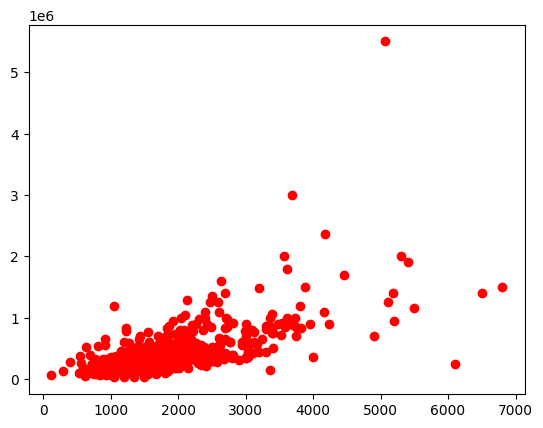

In [20]:
# plot the price and the size
plt.plot(Xs, Ys, 'ro')

In [22]:
#The squeeze() function is used to squeeze 1 dimensional axis objects into scalars.
Xs = Xs.values.squeeze()
Ys = Ys.values.squeeze()

In [23]:
# Normalize the input features
max_size = np.max(Xs)
min_size = np.min(Xs)
max_price = np.max(Ys)
min_price = np.min(Ys)
Xs = (Xs - min_size) / (max_size - min_size)
Ys = (Ys - min_price) / (max_price - min_price)

In [24]:
# shuffle the dataset before separating test/train sets
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]

In [27]:
# separate train/test sets 
# Use 80% for training and 20% for testing
train_size = int(0.8 * dataset_size)
Xs_train = Xs[0:train_size]
Xs_test = Xs[train_size:]
Ys_train = Ys[0:train_size]
Ys_test = Ys[train_size:]

Text(0, 0.5, 'Price')

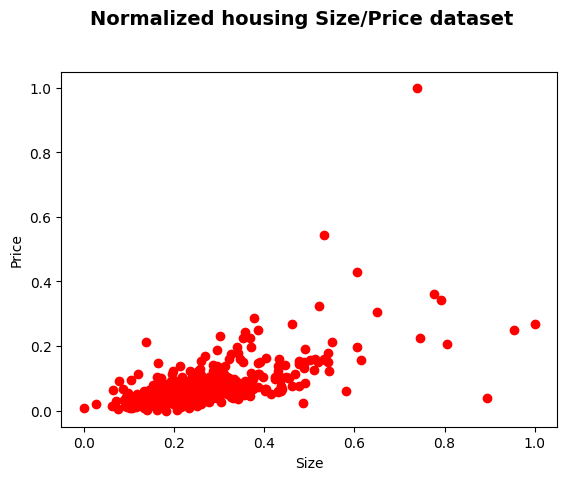

In [28]:
# plot the price and the size
fig = plt.figure()
fig.suptitle('Normalized housing Size/Price dataset', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.plot(Xs_train, Ys_train, 'ro')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

In [26]:
min_x = np.min(Xs_train)
max_x = np.max(Xs_train)

In [29]:
# Define the Linear model
# Initialize the weights using a normal (Gaussian) distribution with 0 mean and unit variance
W0 = np.random.normal(loc=0, scale=0.02) # Y intercept
W1 = np.asarray(np.random.normal(loc=0, scale=0.02)) # Slop of the line
W1 = W1.reshape((1))

In [30]:
def next_batch(Xs, Ys, batch_size=64):
    p = np.random.permutation(len(Xs))
    Xs = Xs[p]
    Ys = Ys[p]
    for i in range(0,Xs.shape[0],batch_size):
        x_batch = Xs[i:i+batch_size]
        if x_batch.shape[0] < batch_size:
            continue
        yield np.reshape(x_batch, (batch_size,-1)), Ys[i:i+batch_size]
        

In [31]:
def eval_and_plot(W0, W1, min_x, max_x, id_):
    min_y = W0 + np.dot(W1, min_x)
    max_y = W0 + np.dot(W1, max_x)
    plt.plot(Xs_train, Ys_train, 'ro')
    plt.plot([min_x, max_x], [min_y, max_y], 'k-', lw=2)
    #plt.savefig("./media/fit%(number)04d.png" % {"number": id_})
    #plt.clf()
    plt.show()

In [32]:
# defines the size of the step we want to perform in the direction of the gradient
lr = 0.1

# set the pocket weights
W0_hat = np.inf
W1_hat = np.inf
best_hypothesis = np.inf

validation_err_list = 
[]
training_err_list = []
batch_size = 96
total_epochs = 150

In [33]:
def mean_squared_error(Ys_batch, Y_pred):
    return np.mean((Ys_batch-Y_pred)**2)

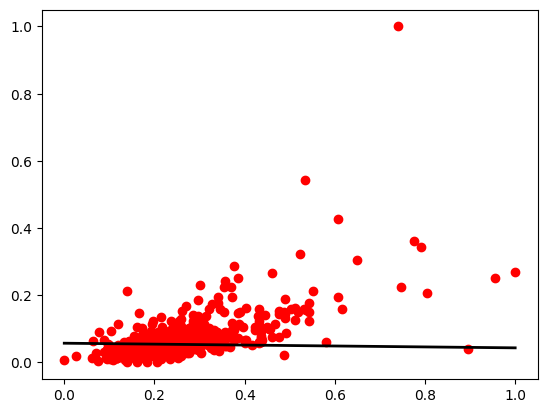

Epoch: 0 Generalization err: 0.002835645007589594


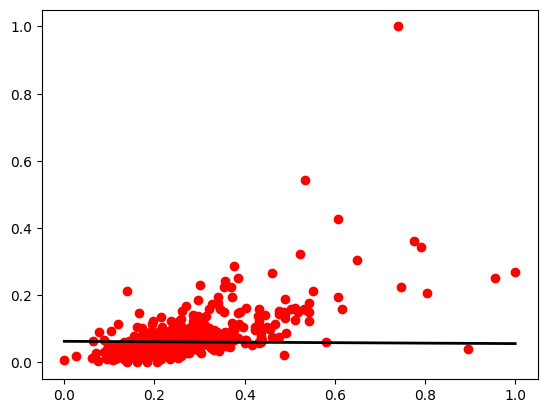

Epoch: 1 Generalization err: 0.0027153793106197044


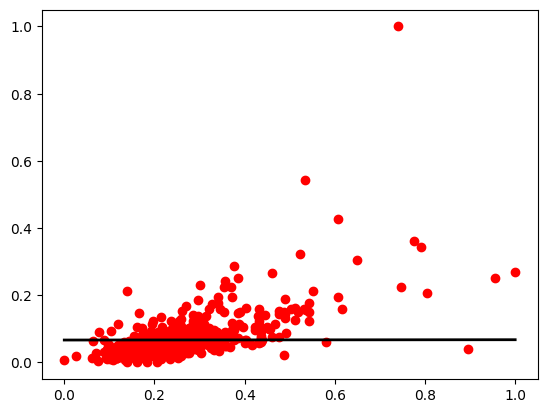

Epoch: 2 Generalization err: 0.002674756930616268


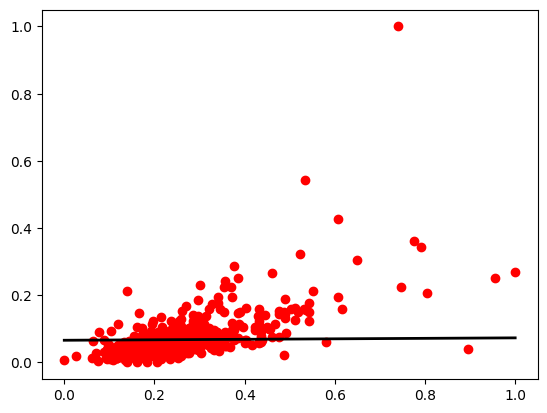

Epoch: 3 Generalization err: 0.0026257654819115657


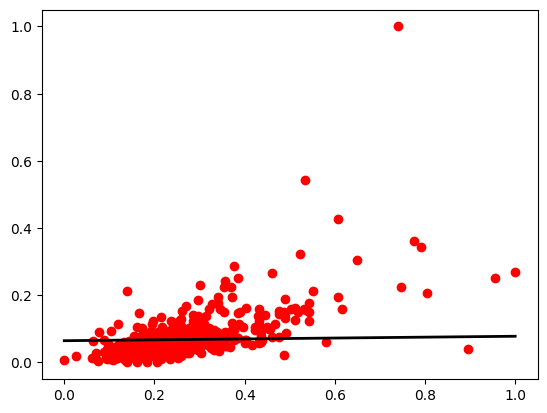

Epoch: 4 Generalization err: 0.0025705091789009625


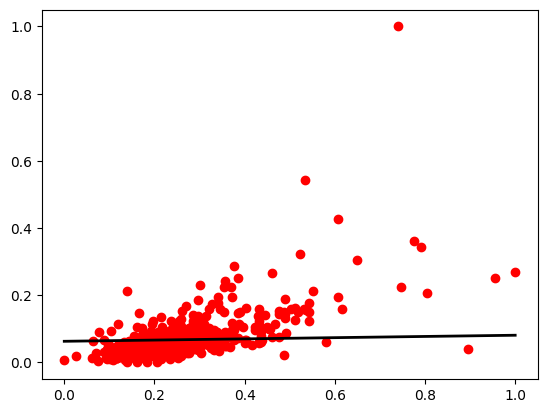

Epoch: 5 Generalization err: 0.0025194550958078385


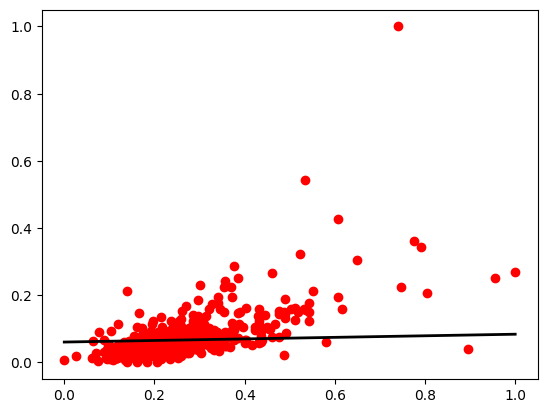

Epoch: 6 Generalization err: 0.0024609167411701396


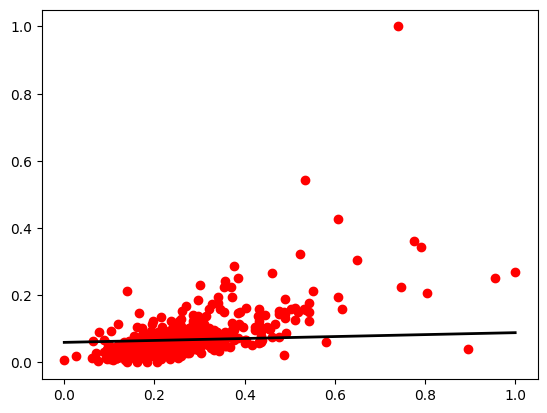

Epoch: 7 Generalization err: 0.0024156756325569954


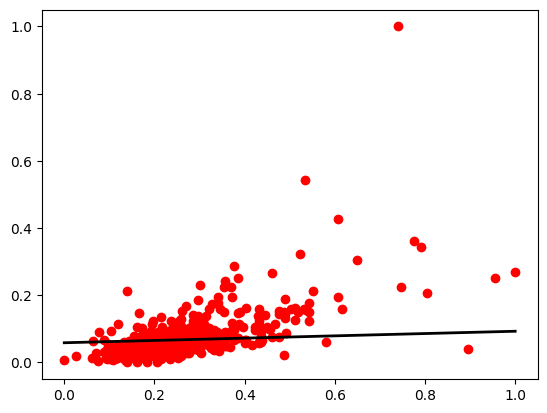

Epoch: 8 Generalization err: 0.0023708860553236454


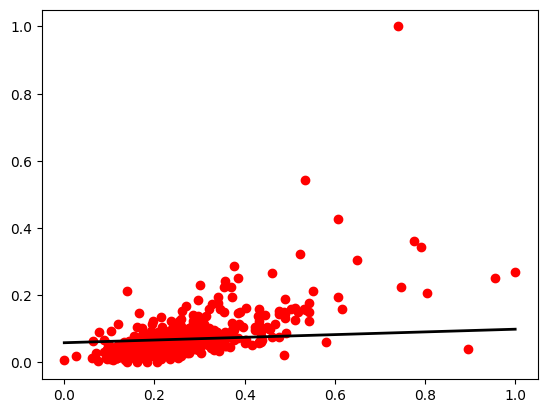

Epoch: 9 Generalization err: 0.002338670570227362


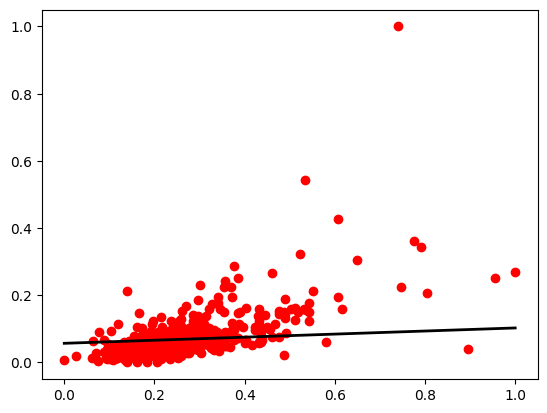

Epoch: 10 Generalization err: 0.0022876264140212423


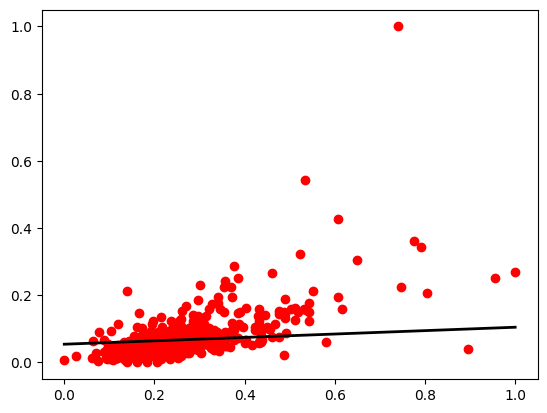

Epoch: 11 Generalization err: 0.0022307578459040685


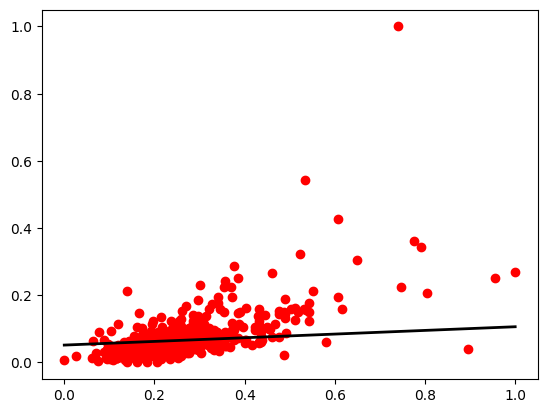

Epoch: 12 Generalization err: 0.0021854097011588525


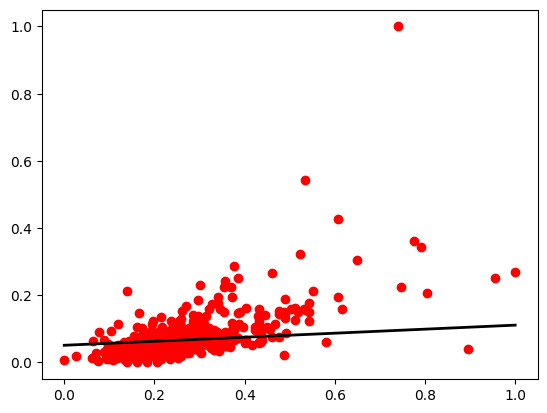

Epoch: 13 Generalization err: 0.0021485072148203933


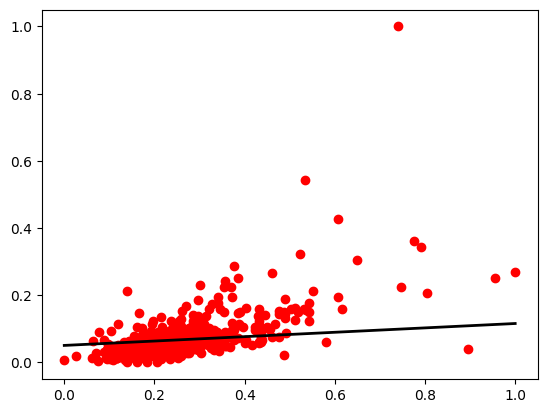

Epoch: 14 Generalization err: 0.0021149925044667973


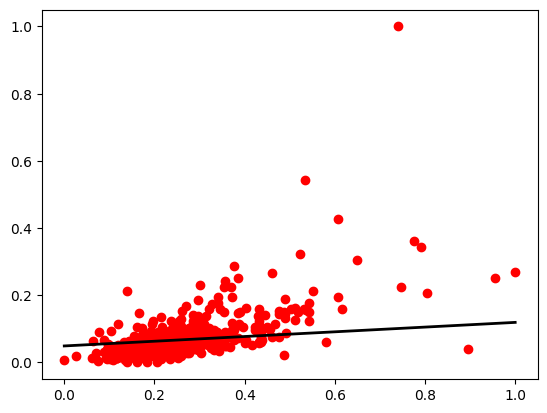

Epoch: 15 Generalization err: 0.002074633989787444


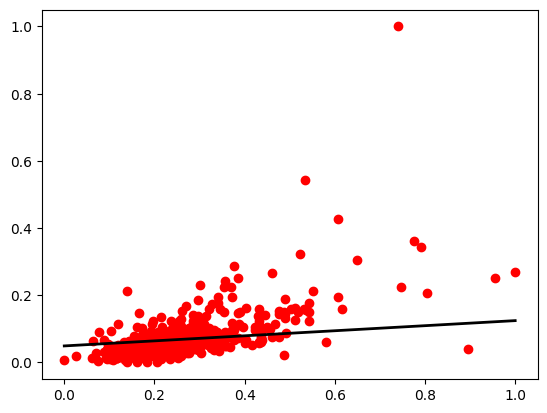

Epoch: 16 Generalization err: 0.002049347797049678


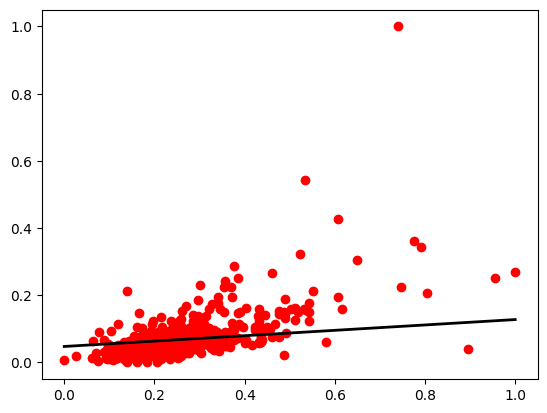

Epoch: 17 Generalization err: 0.0020094167755601855


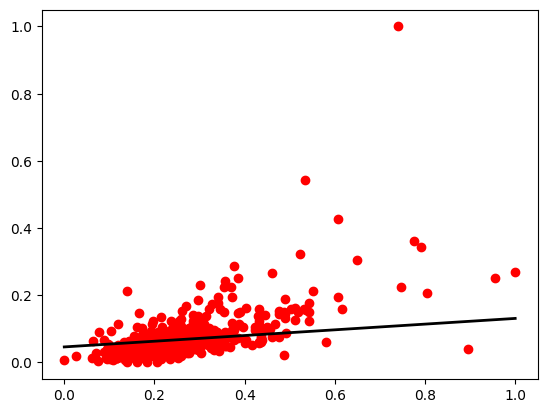

Epoch: 18 Generalization err: 0.0019735032862987605


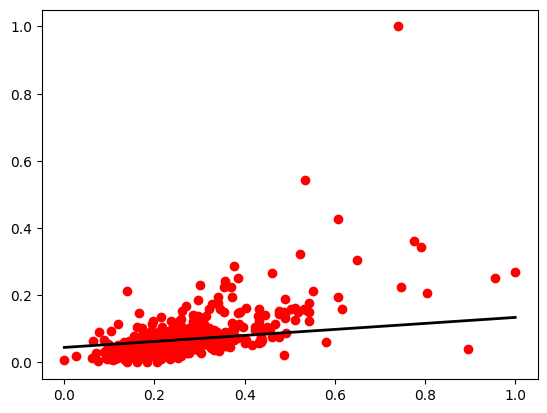

Epoch: 19 Generalization err: 0.001938209318487841


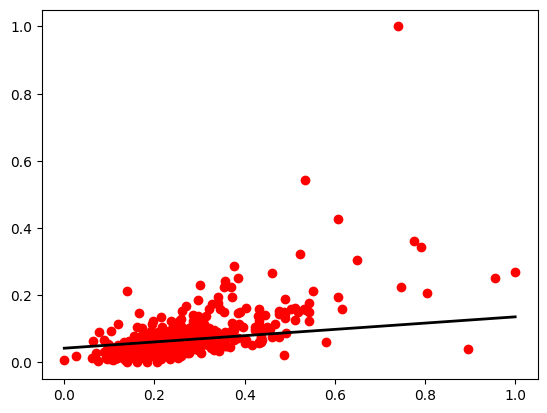

Epoch: 20 Generalization err: 0.0019009772298397216


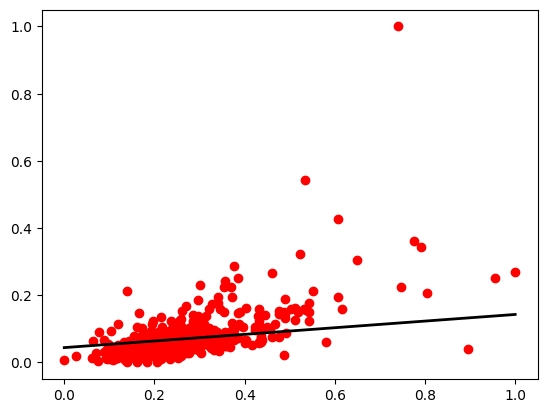

Epoch: 21 Generalization err: 0.001892897165972972


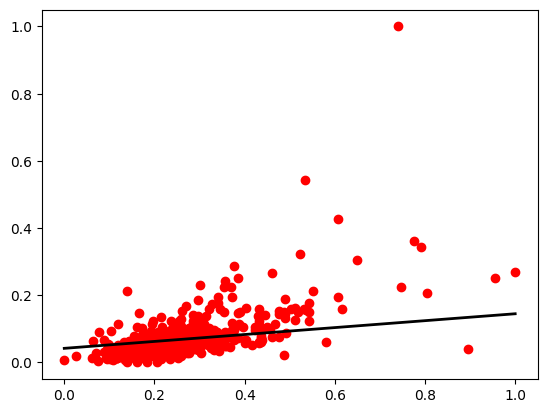

Epoch: 22 Generalization err: 0.0018524784822102458


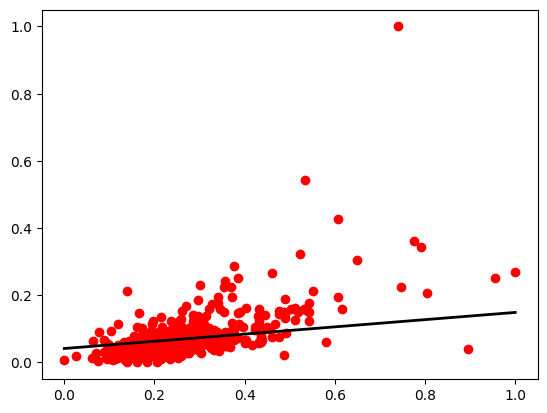

Epoch: 23 Generalization err: 0.0018297417044128303


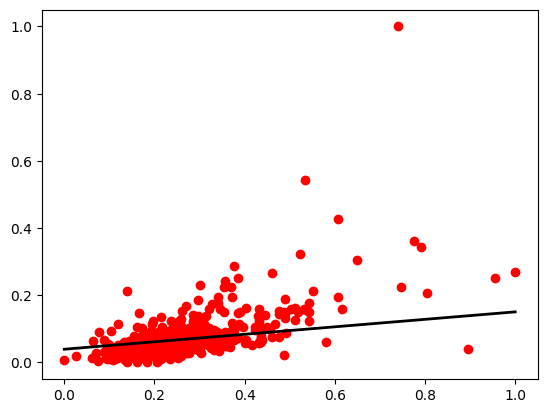

Epoch: 24 Generalization err: 0.0017940475878592032


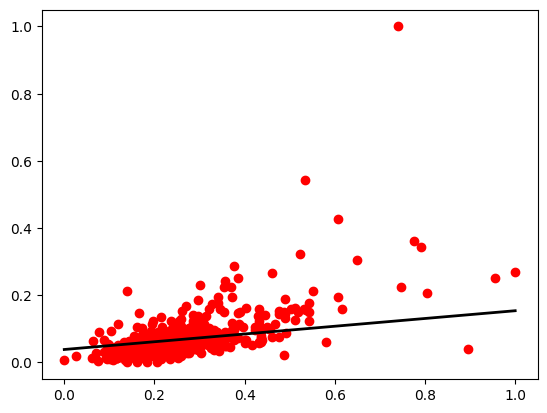

Epoch: 25 Generalization err: 0.0017702396002743268


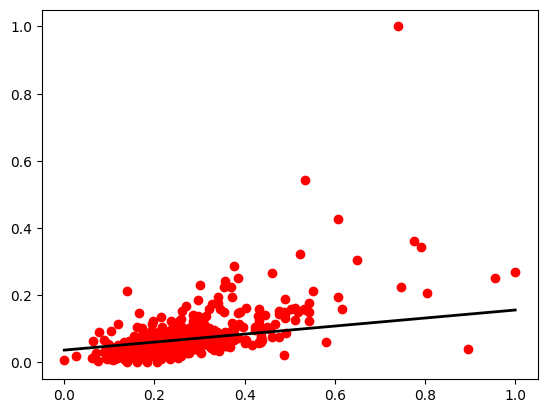

Epoch: 26 Generalization err: 0.0017400329939219765


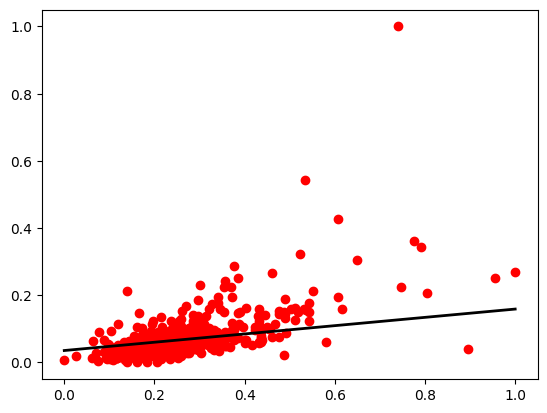

Epoch: 27 Generalization err: 0.0017140748195263575


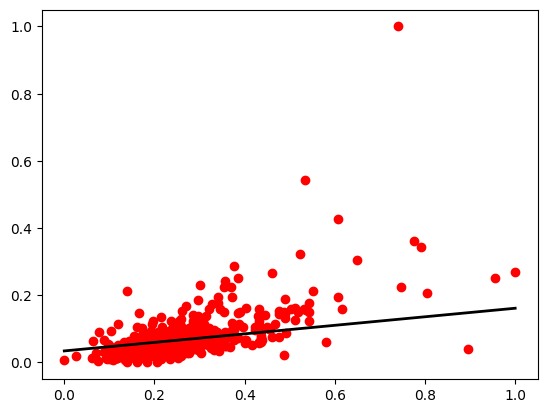

Epoch: 28 Generalization err: 0.001691033643849167


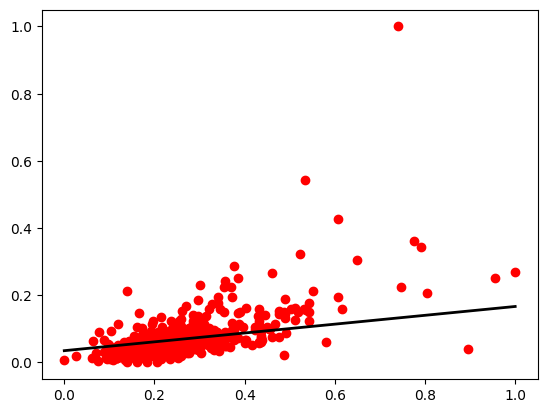

Epoch: 29 Generalization err: 0.0016788482768761818


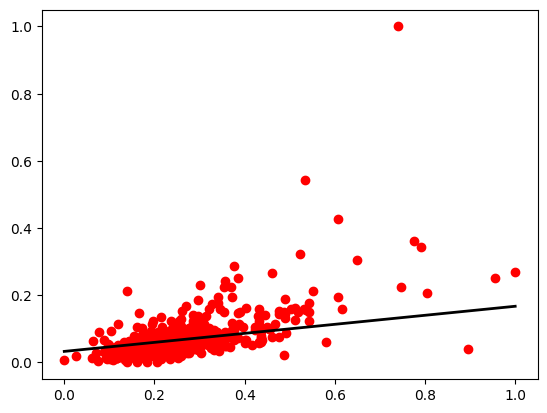

Epoch: 30 Generalization err: 0.0016522302861286216


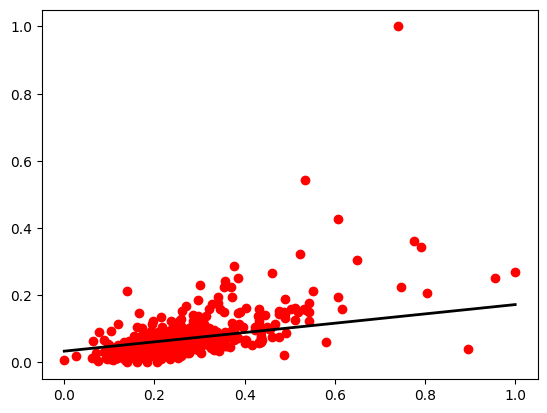

Epoch: 31 Generalization err: 0.0016422590571169824


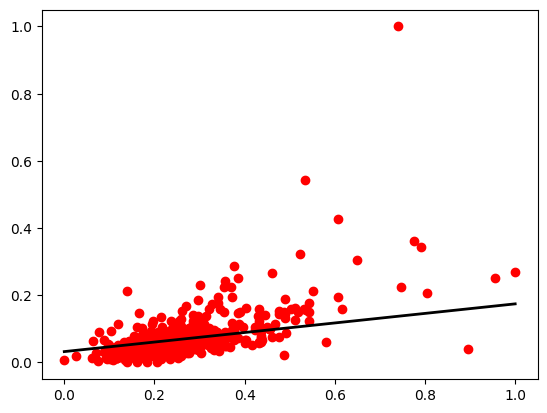

Epoch: 32 Generalization err: 0.0016196325160697496


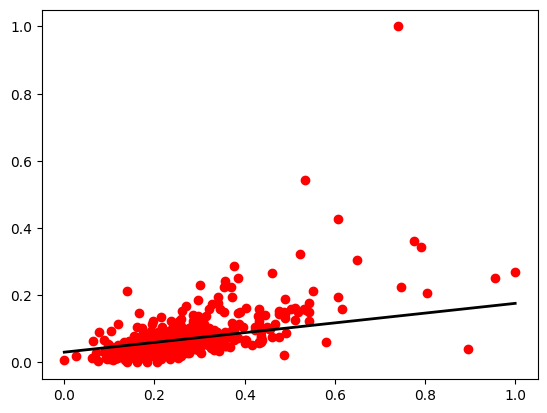

Epoch: 33 Generalization err: 0.0015955634722698946


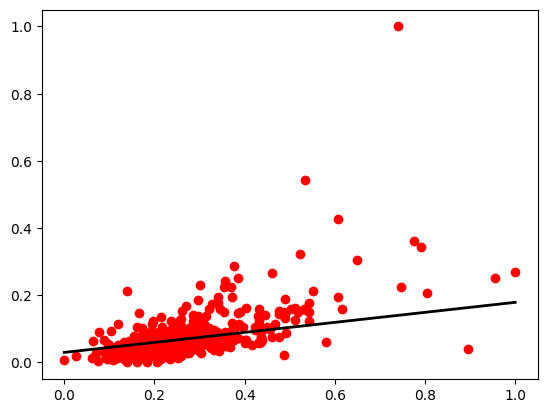

Epoch: 34 Generalization err: 0.0015778816401397105


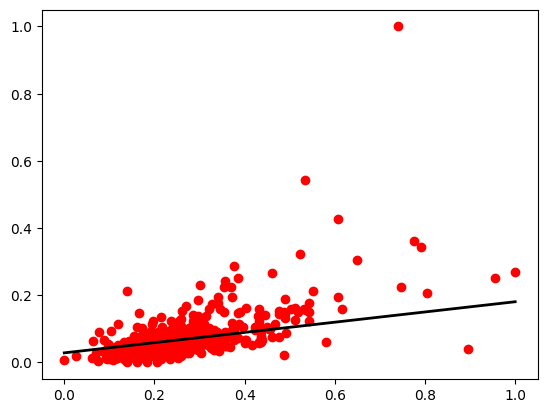

Epoch: 35 Generalization err: 0.001558277980073986


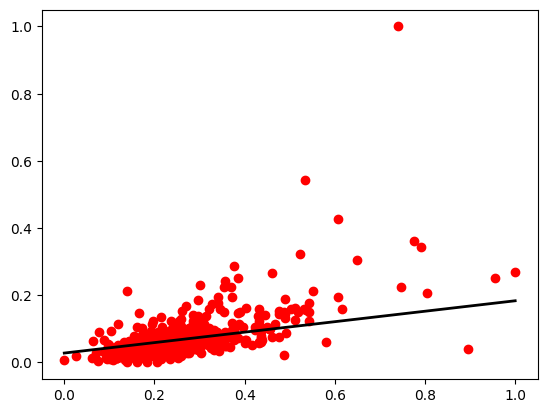

Epoch: 36 Generalization err: 0.0015427436962429826


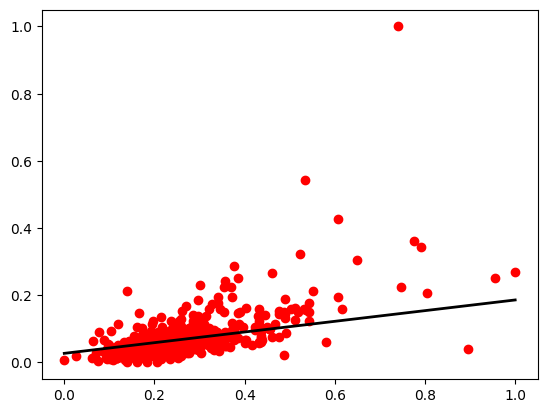

Epoch: 37 Generalization err: 0.001526624675593839


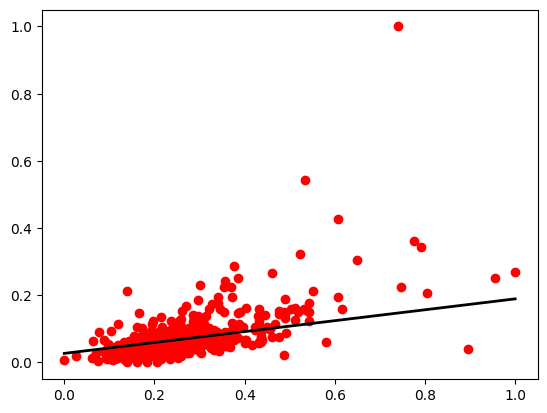

Epoch: 38 Generalization err: 0.0015151779211197264


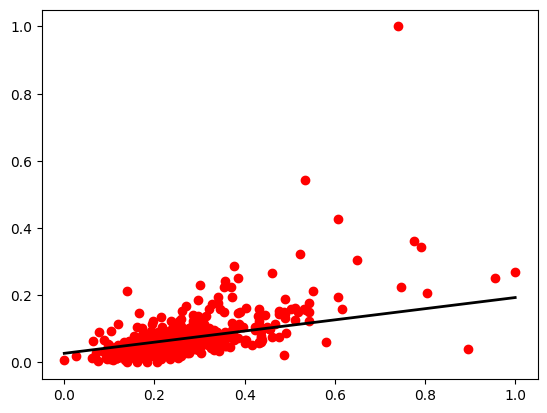

Epoch: 39 Generalization err: 0.0015070972538083378


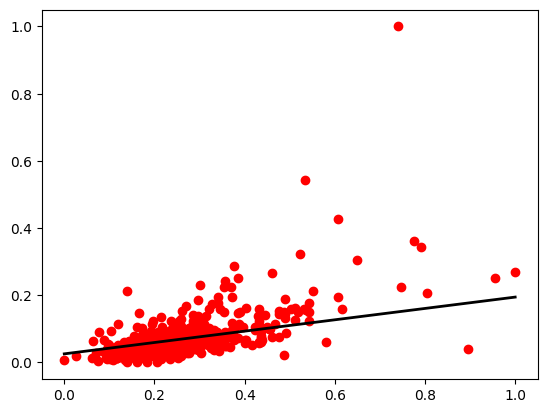

Epoch: 40 Generalization err: 0.0014865289249133568


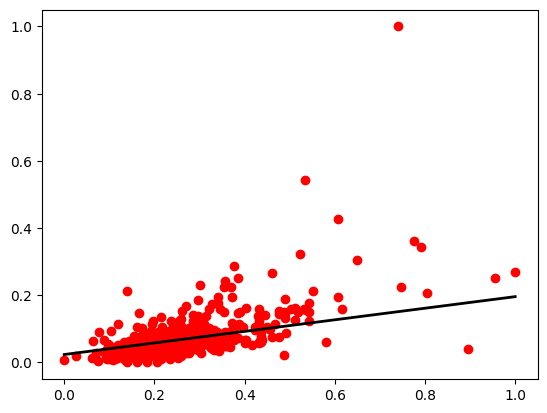

Epoch: 41 Generalization err: 0.0014646820263314727


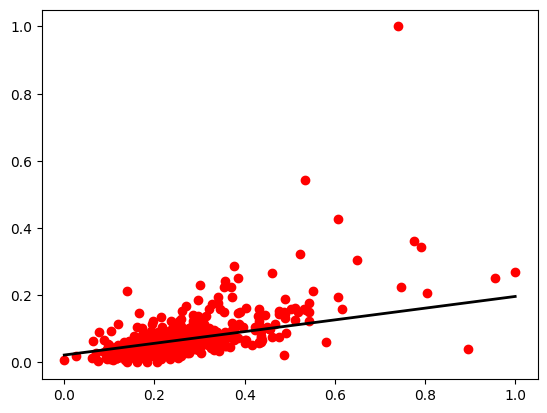

Epoch: 42 Generalization err: 0.0014509687169297467


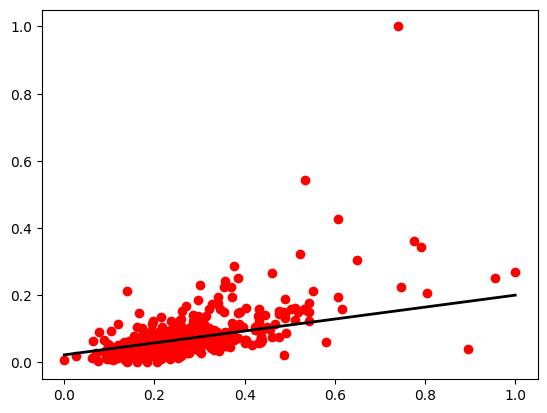

Epoch: 43 Generalization err: 0.0014429729572162948


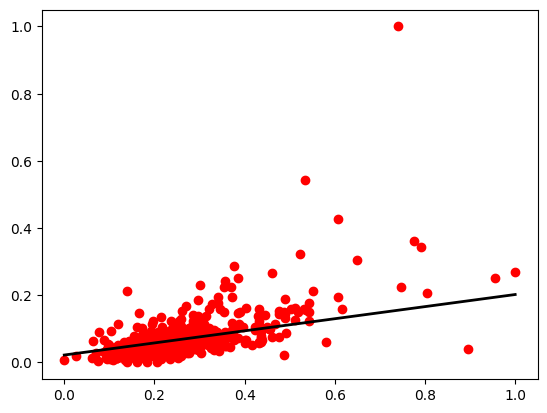

Epoch: 44 Generalization err: 0.001433095642171957


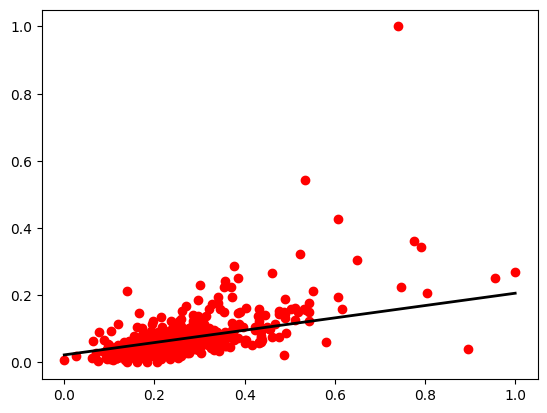

Epoch: 45 Generalization err: 0.0014279603139061002


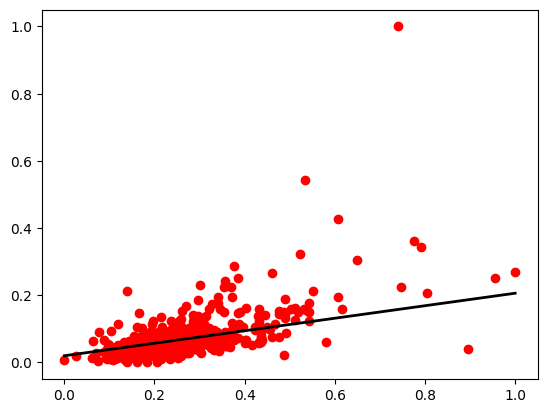

Epoch: 46 Generalization err: 0.0014051709149904923


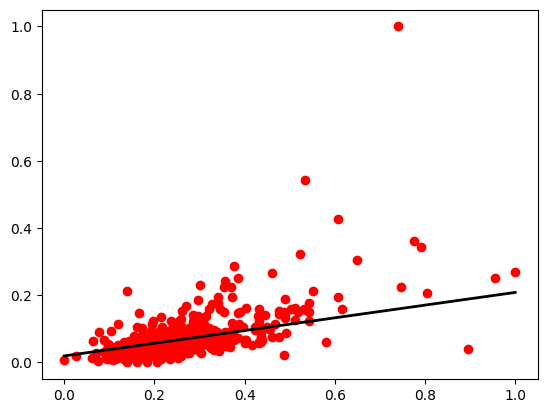

Epoch: 47 Generalization err: 0.0013948671357239225


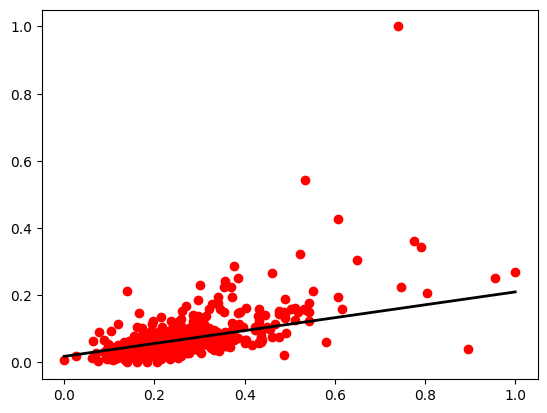

Epoch: 48 Generalization err: 0.001381953120063914


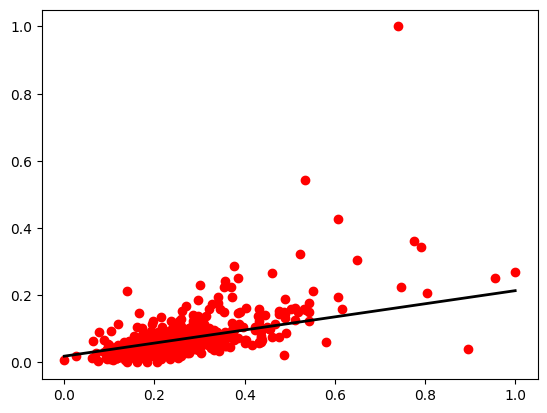

Epoch: 49 Generalization err: 0.0013762295394275108


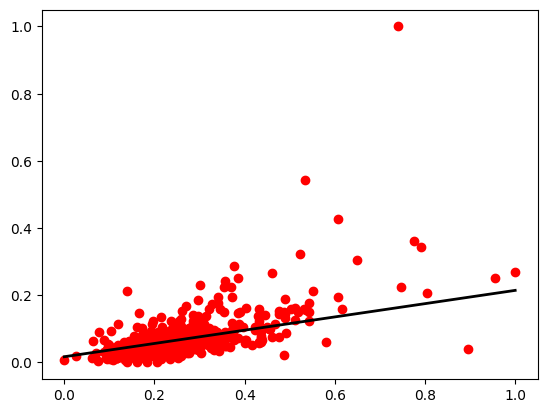

Epoch: 50 Generalization err: 0.001361900288691874


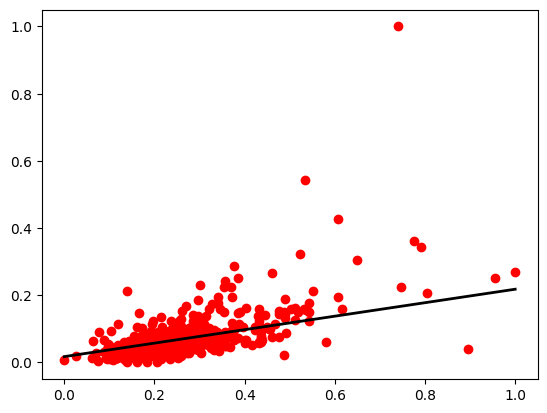

Epoch: 51 Generalization err: 0.0013565157782496997


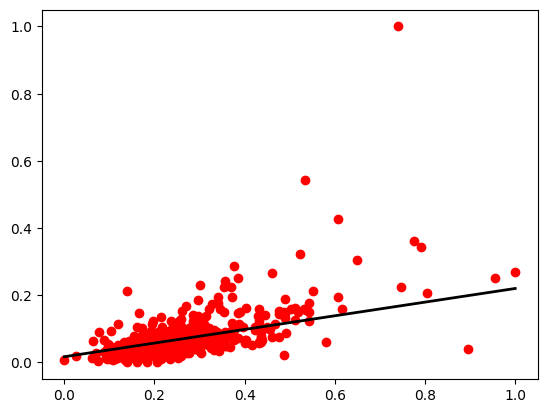

Epoch: 52 Generalization err: 0.001349346421638009


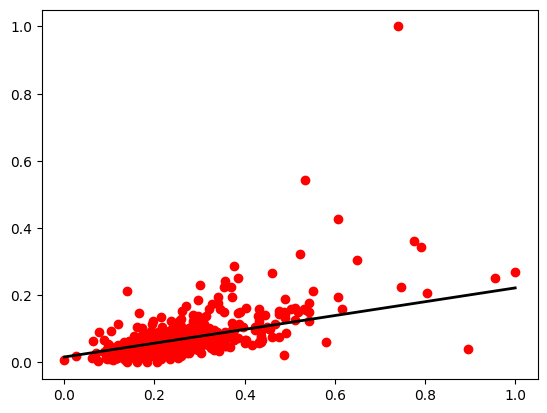

Epoch: 53 Generalization err: 0.0013394357796299868


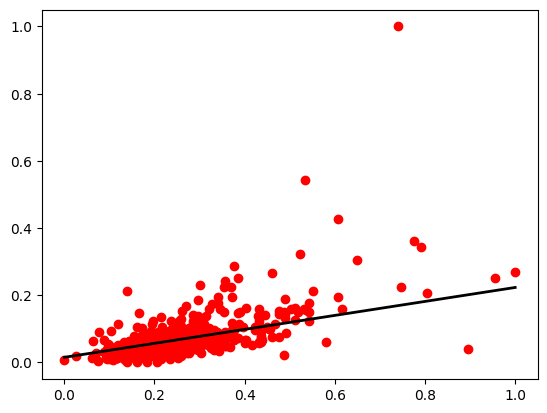

Epoch: 54 Generalization err: 0.0013296316430653299


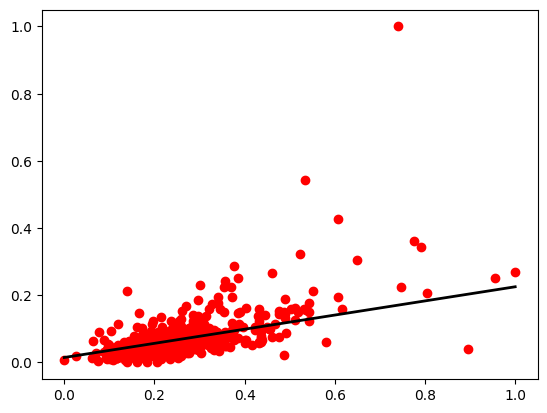

Epoch: 55 Generalization err: 0.001322189424497042


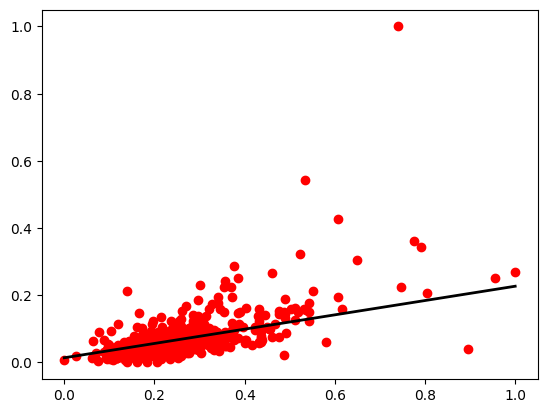

Epoch: 56 Generalization err: 0.001313197889838054


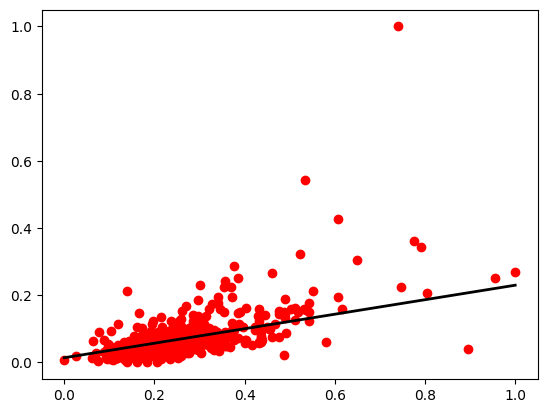

Epoch: 57 Generalization err: 0.0013091492024092858


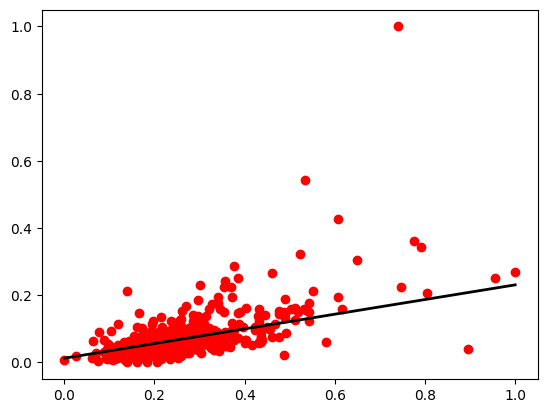

Epoch: 58 Generalization err: 0.0012968021459030385


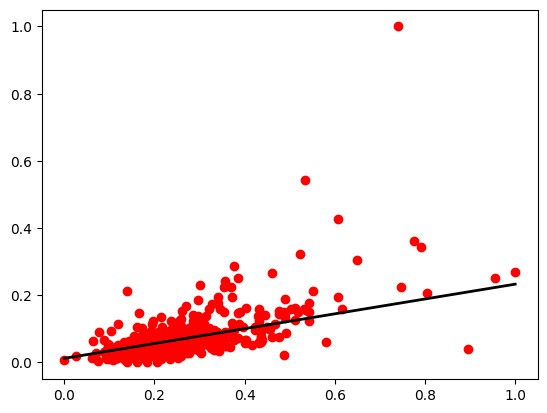

Epoch: 59 Generalization err: 0.0012907654248588414


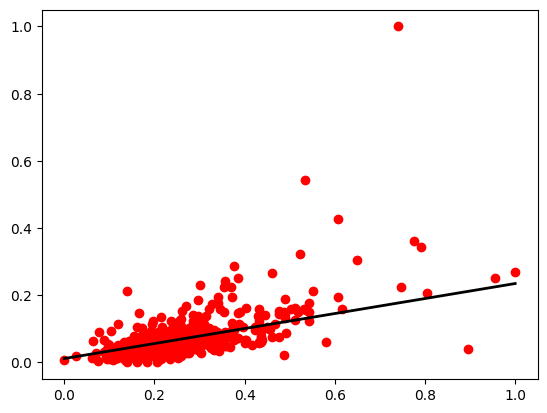

Epoch: 60 Generalization err: 0.0012835737055017387


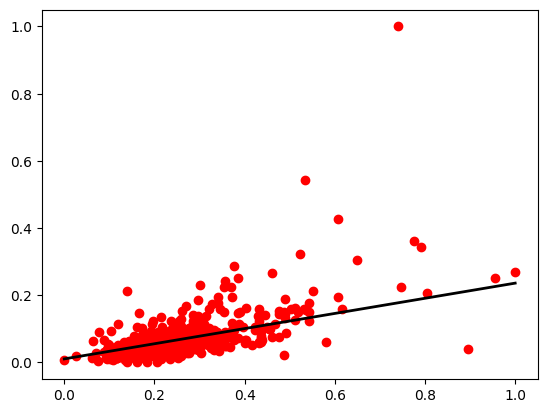

Epoch: 61 Generalization err: 0.0012750156921668666


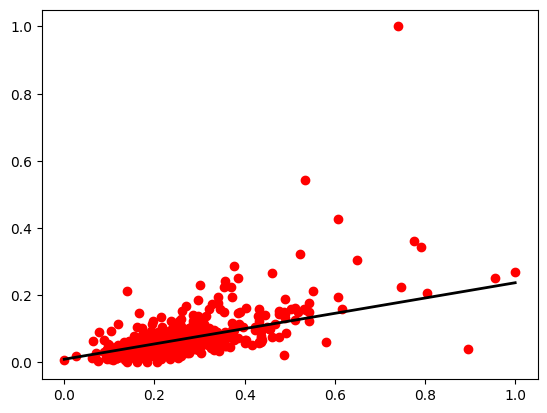

Epoch: 62 Generalization err: 0.001267567100556023


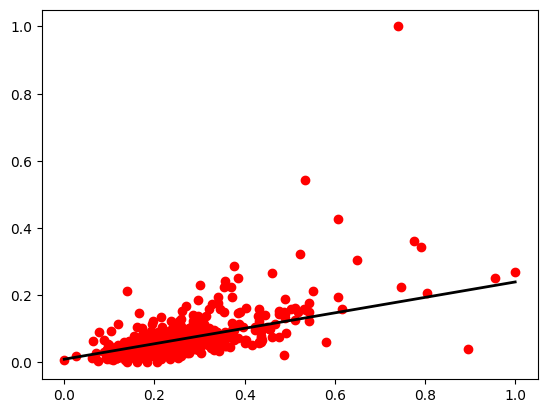

Epoch: 63 Generalization err: 0.0012639221817840175


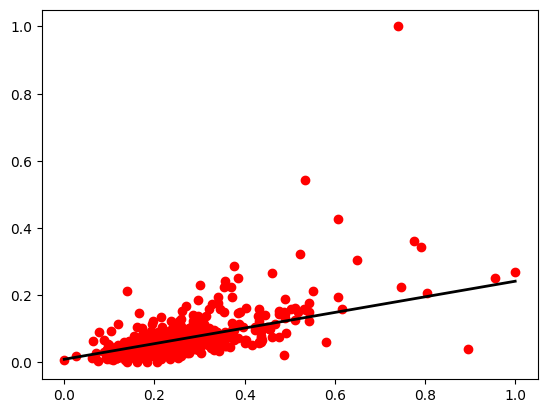

Epoch: 64 Generalization err: 0.0012597793203394892


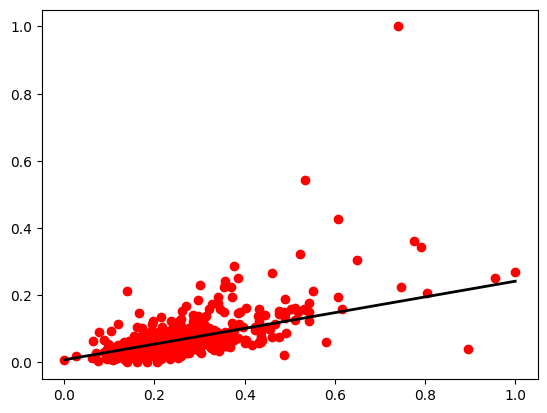

Epoch: 65 Generalization err: 0.0012506163683545077


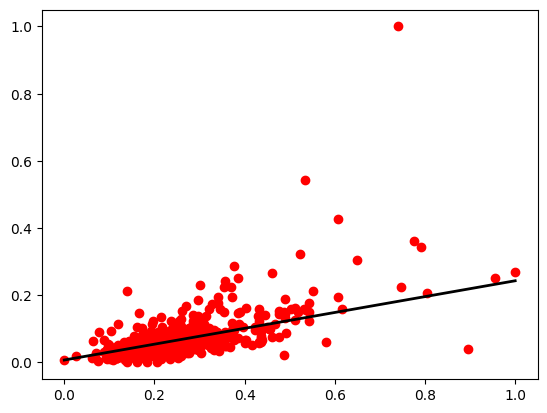

Epoch: 66 Generalization err: 0.001245602423163838


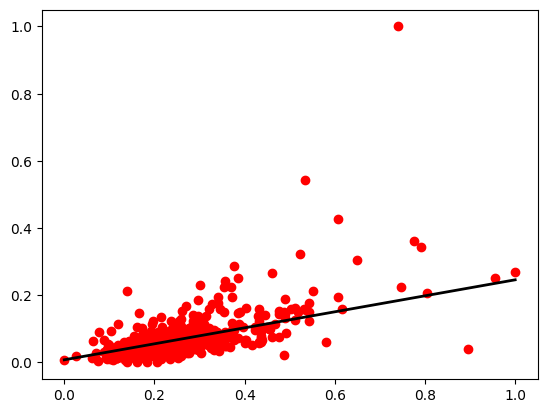

Epoch: 67 Generalization err: 0.0012444455900762633


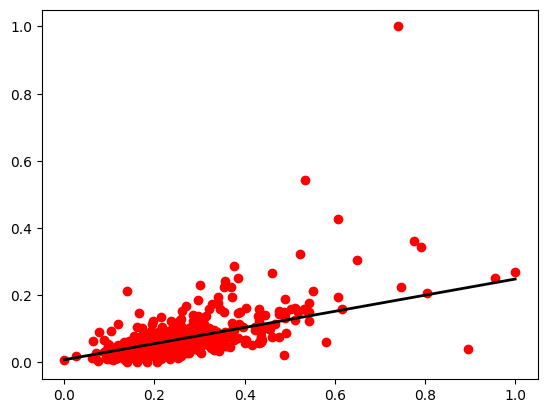

Epoch: 68 Generalization err: 0.0012426169396365914


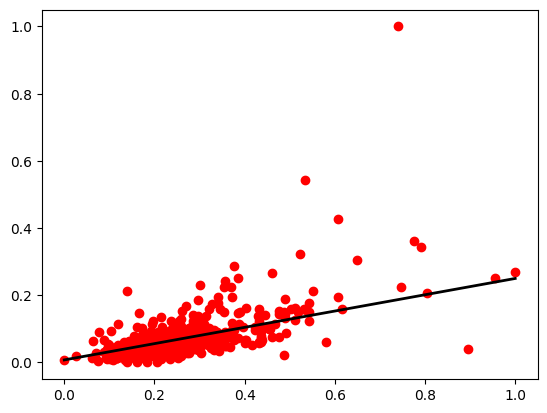

Epoch: 69 Generalization err: 0.001238134480299922


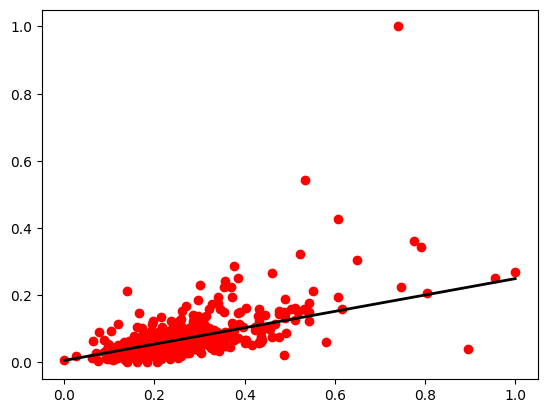

Epoch: 70 Generalization err: 0.0012293672076474401


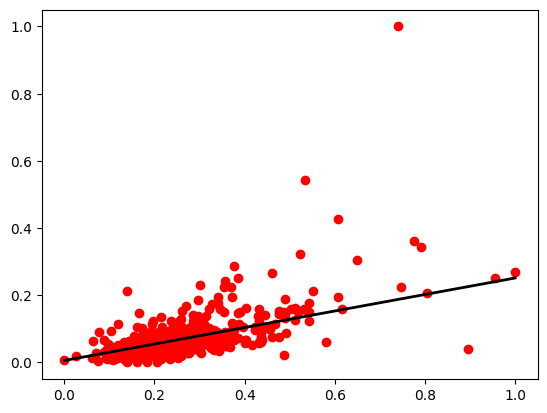

Epoch: 71 Generalization err: 0.0012261406185261915


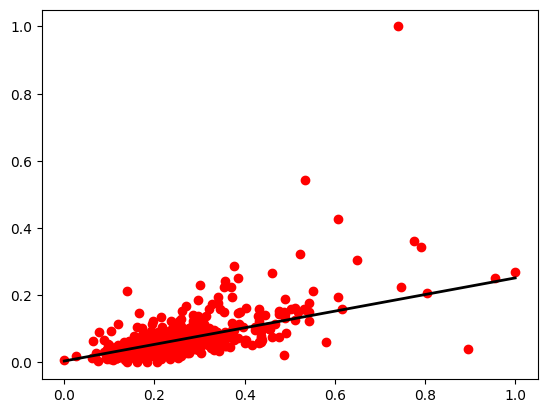

Epoch: 72 Generalization err: 0.001220055285307753


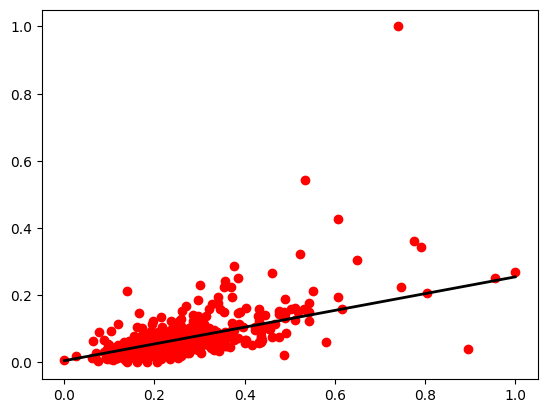

Epoch: 73 Generalization err: 0.0012199188747681262


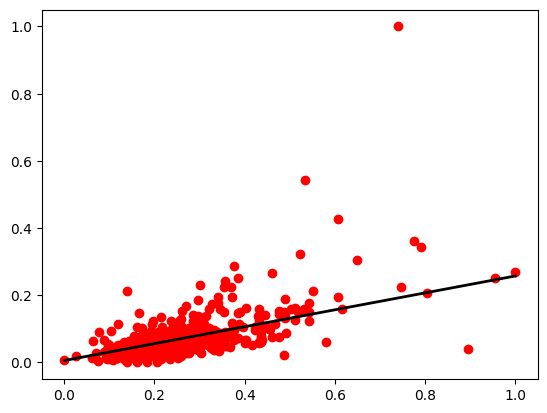

Epoch: 74 Generalization err: 0.0012212080180775131


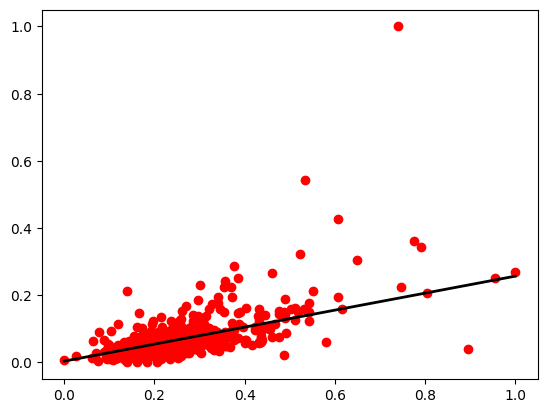

Epoch: 75 Generalization err: 0.0012115407355010345


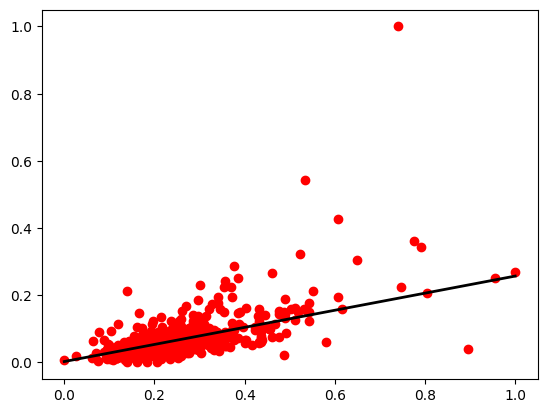

Epoch: 76 Generalization err: 0.0012065078162505794


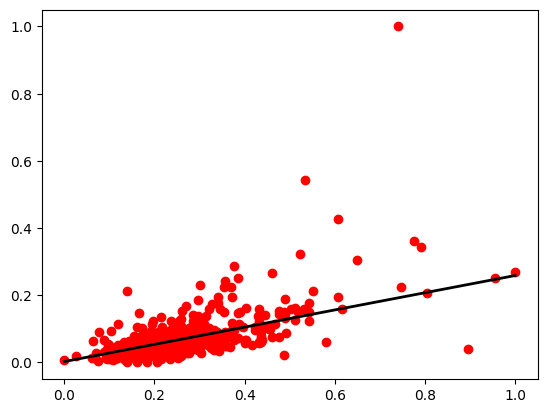

Epoch: 77 Generalization err: 0.0012037996905074426


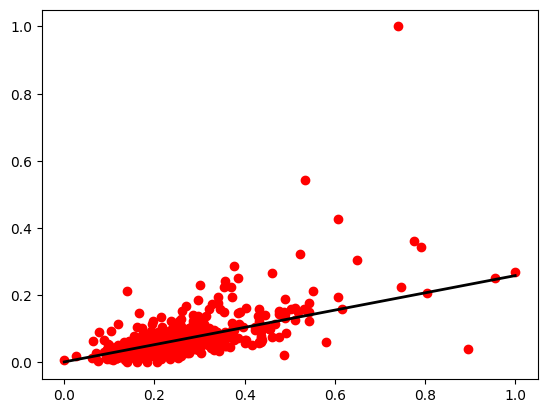

Epoch: 78 Generalization err: 0.0012013886729535864


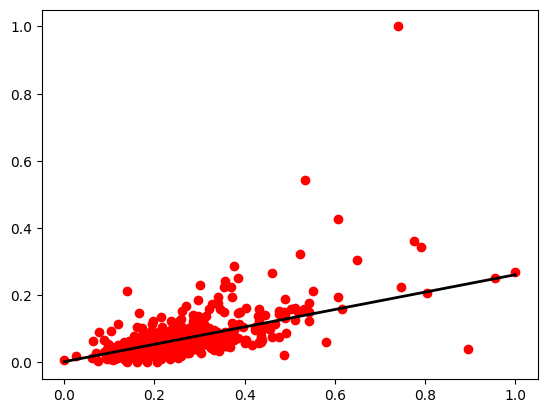

Epoch: 79 Generalization err: 0.0012001338253288811


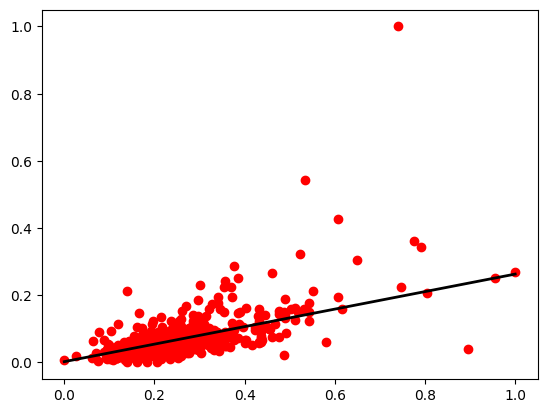

Epoch: 80 Generalization err: 0.001198961069042228


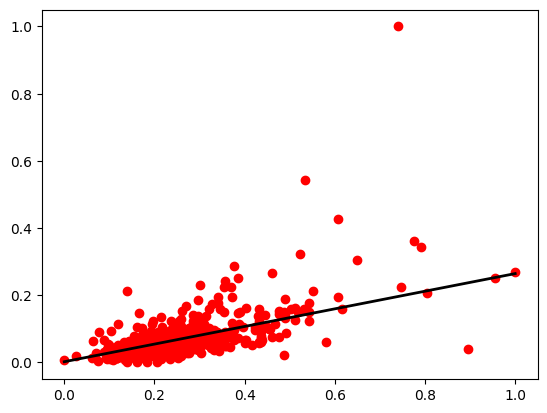

Epoch: 81 Generalization err: 0.0011970116531821306


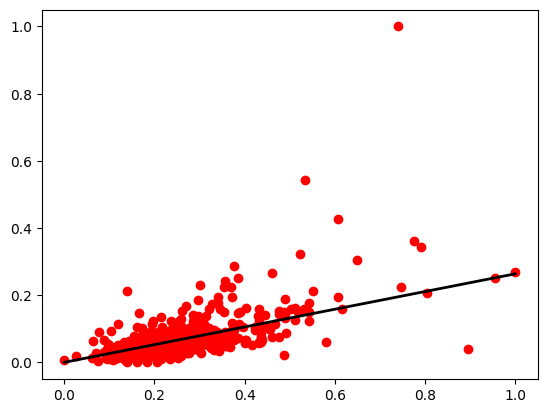

Epoch: 82 Generalization err: 0.0011907266277164216


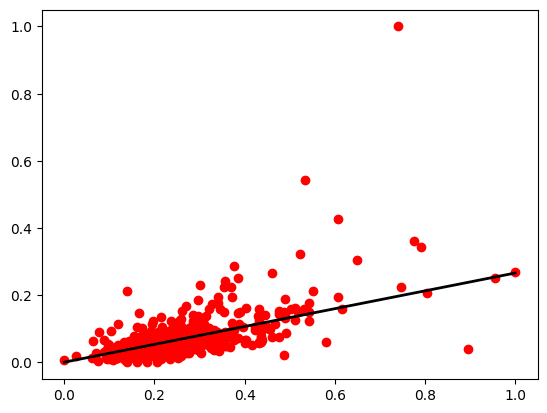

Epoch: 83 Generalization err: 0.0011898720944690476


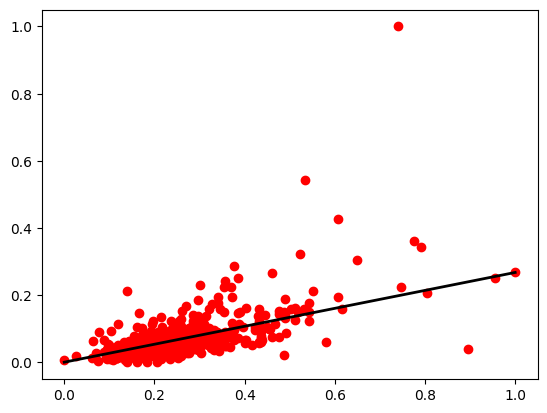

Epoch: 84 Generalization err: 0.0011886717565331292


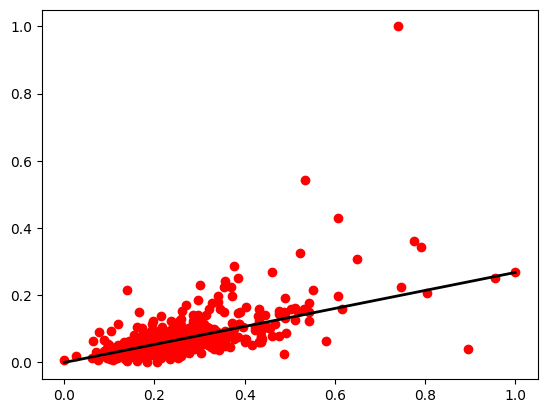

Epoch: 85 Generalization err: 0.0011833805849969274


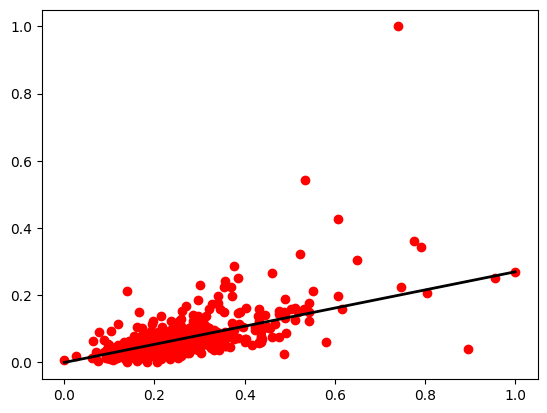

Epoch: 86 Generalization err: 0.0011827839255750246


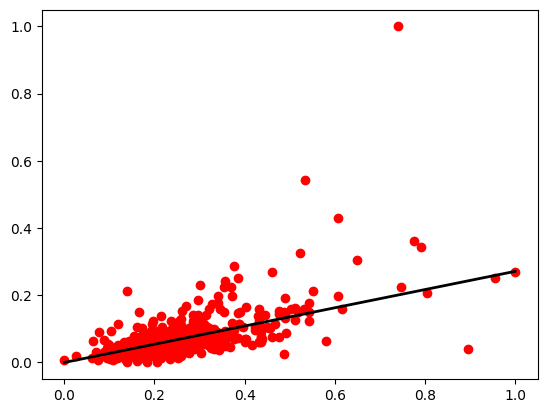

Epoch: 87 Generalization err: 0.0011806542447648826


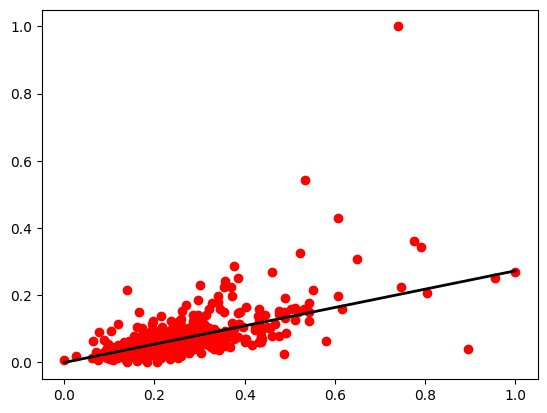

Epoch: 88 Generalization err: 0.0011788568540663498


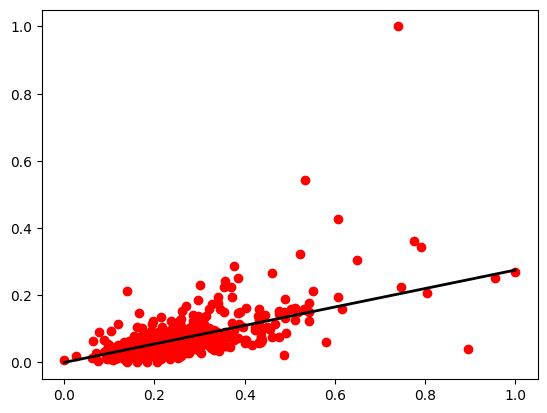

Epoch: 89 Generalization err: 0.0011841750849202874


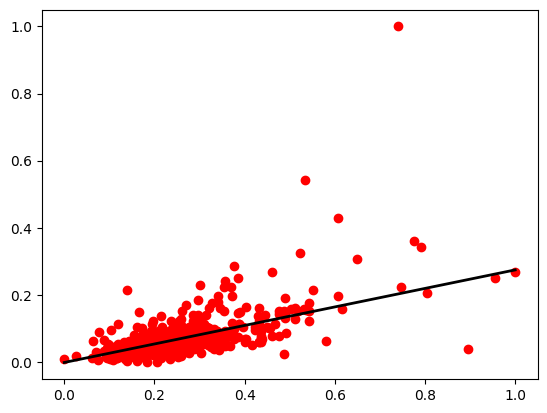

Epoch: 90 Generalization err: 0.0011761985954988035


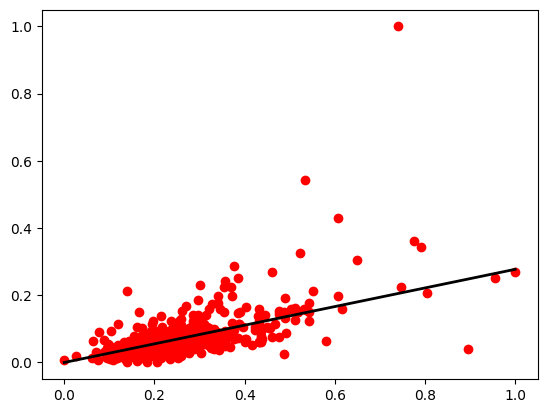

Epoch: 91 Generalization err: 0.001178776019335376


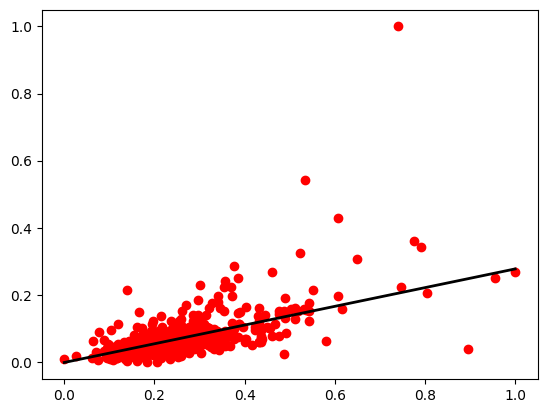

Epoch: 92 Generalization err: 0.0011756089118740336


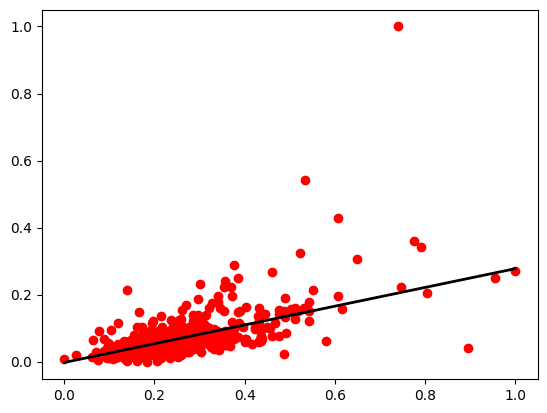

Epoch: 93 Generalization err: 0.00117127557346697


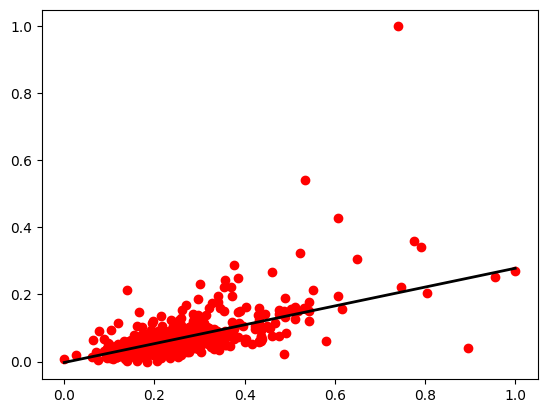

Epoch: 94 Generalization err: 0.001169893895586928


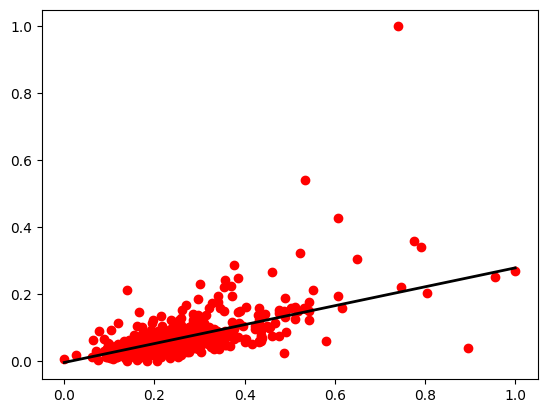

Epoch: 95 Generalization err: 0.0011679675749623152


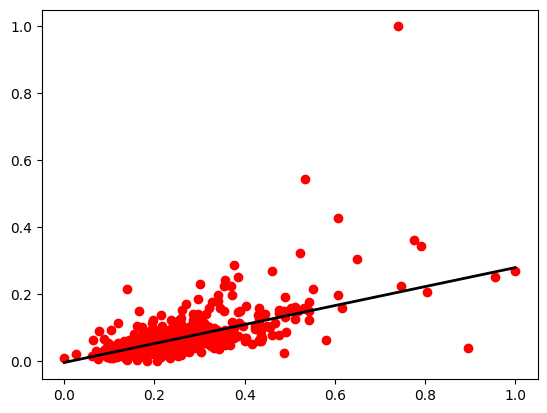

Epoch: 96 Generalization err: 0.0011654406846991012


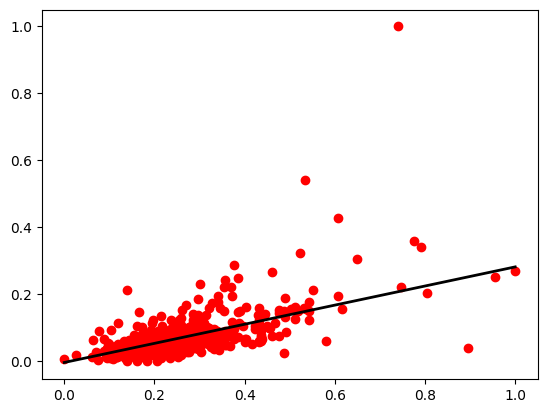

Epoch: 97 Generalization err: 0.001168486442001174


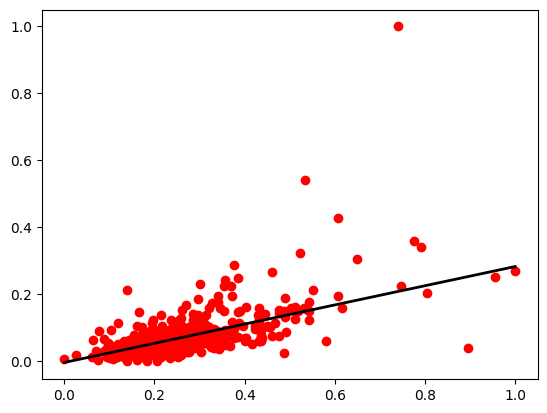

Epoch: 98 Generalization err: 0.0011663414448419898


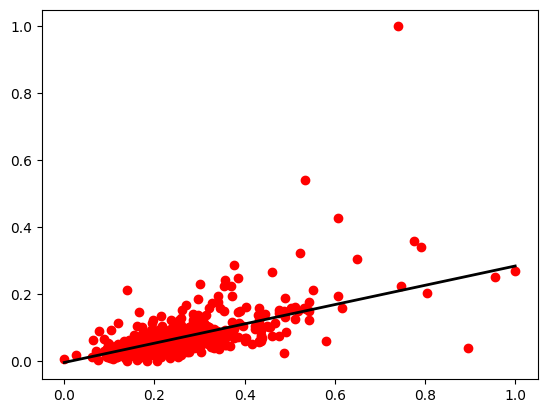

Epoch: 99 Generalization err: 0.001166664090738877


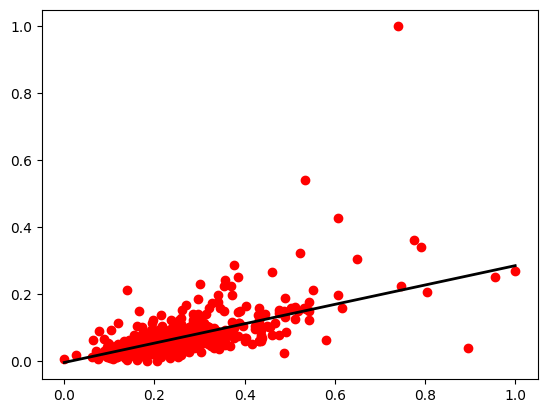

Epoch: 100 Generalization err: 0.0011646174013466844


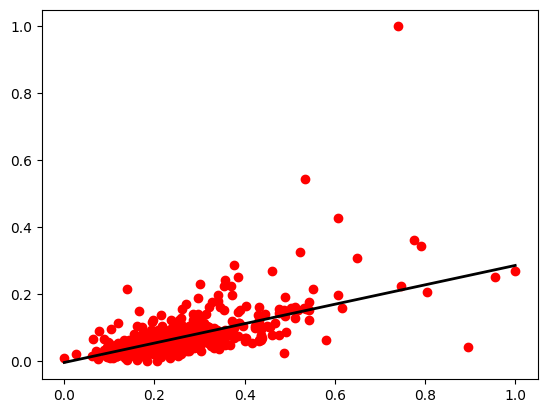

Epoch: 101 Generalization err: 0.0011611066092233064


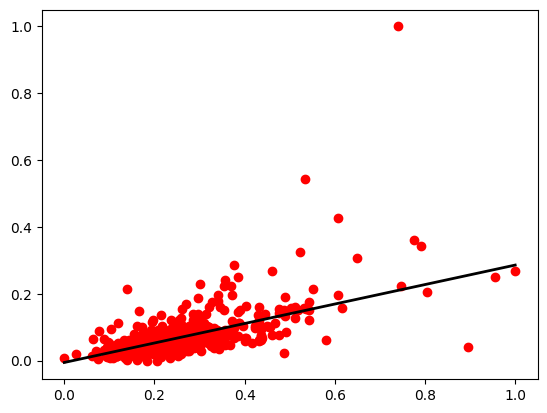

Epoch: 102 Generalization err: 0.0011609461384002374


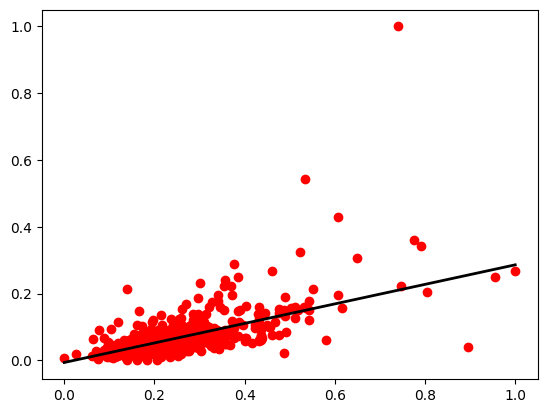

Epoch: 103 Generalization err: 0.0011590586404539415


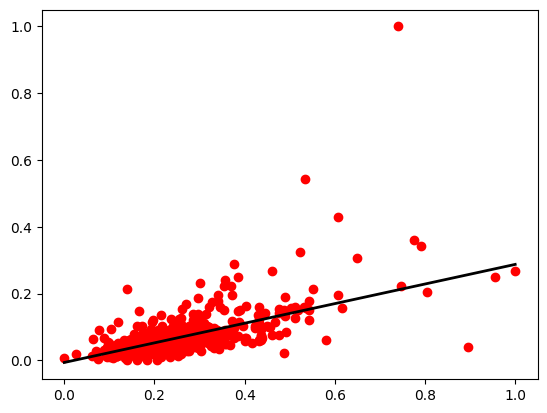

Epoch: 104 Generalization err: 0.001159119770622451


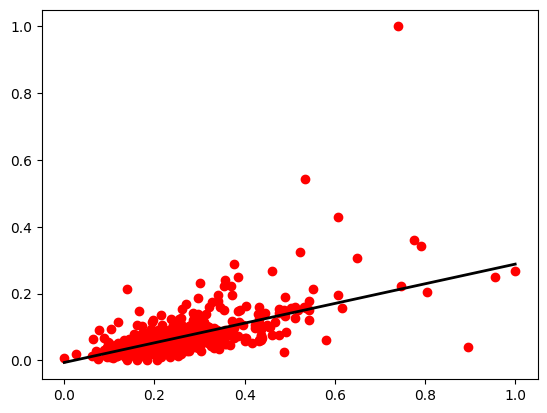

Epoch: 105 Generalization err: 0.0011585136399521908


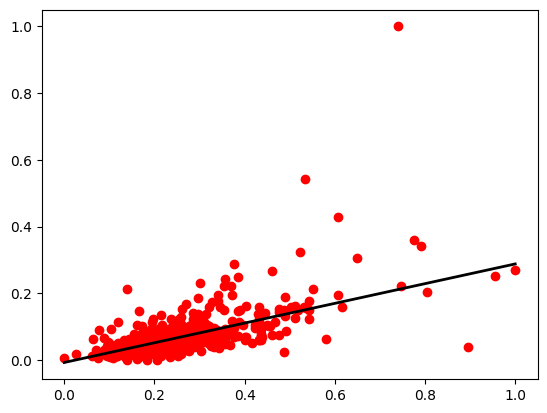

Epoch: 106 Generalization err: 0.001156952357375526


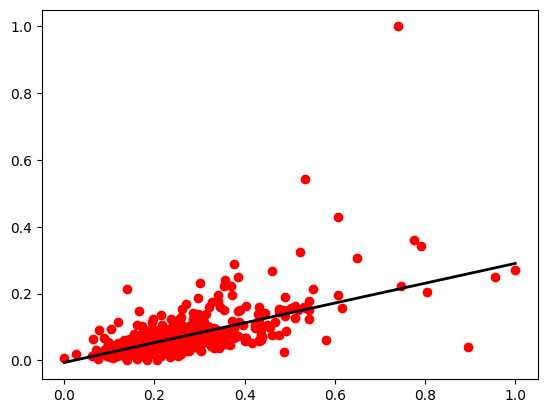

Epoch: 107 Generalization err: 0.001157723621526332


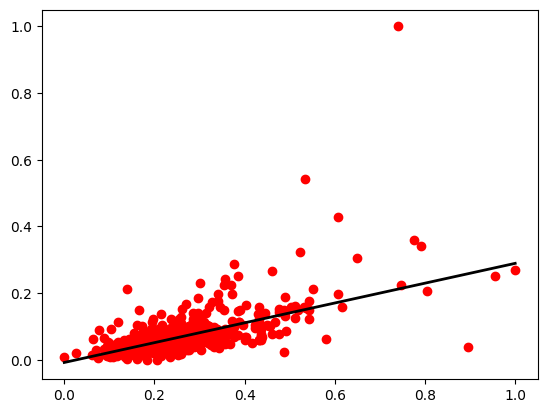

Epoch: 108 Generalization err: 0.0011555185514966328


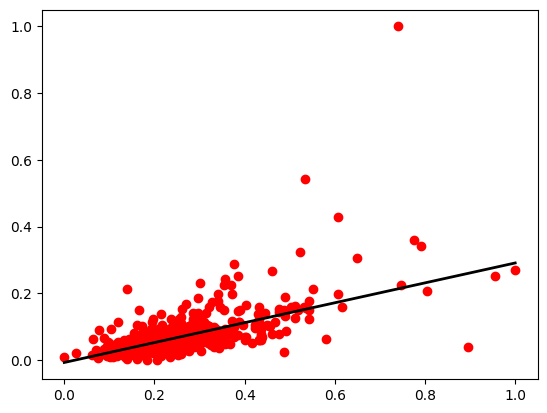

Epoch: 109 Generalization err: 0.0011552572290440526


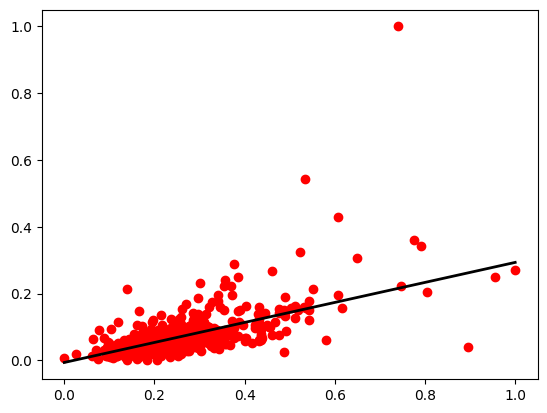

Epoch: 110 Generalization err: 0.0011592151419671443


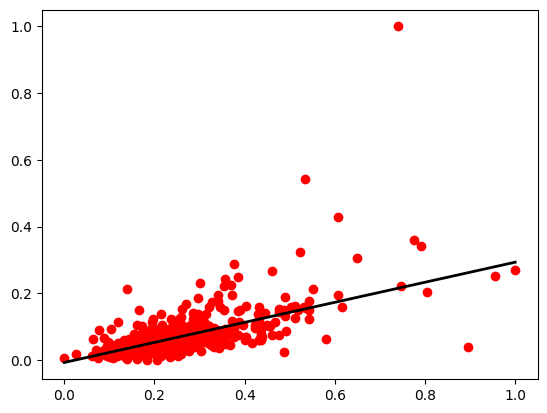

Epoch: 111 Generalization err: 0.0011563529467191835


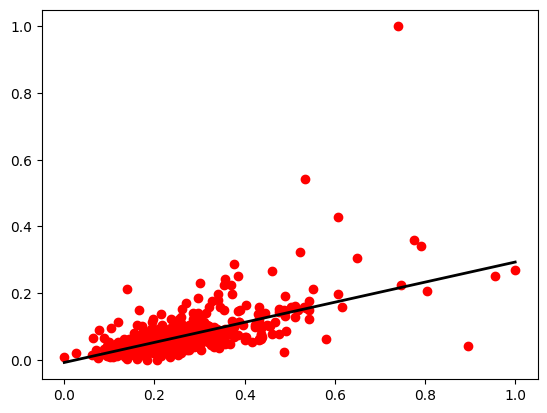

Epoch: 112 Generalization err: 0.0011541756458073589


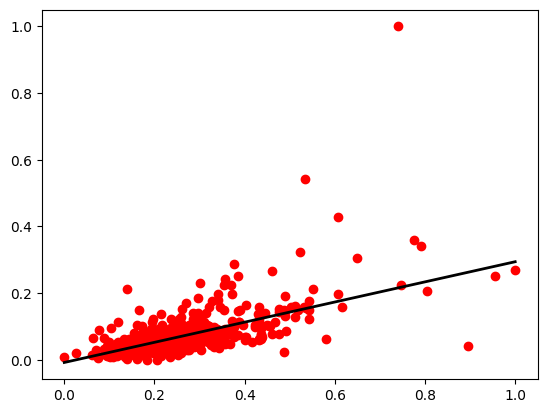

Epoch: 113 Generalization err: 0.001154191374652679


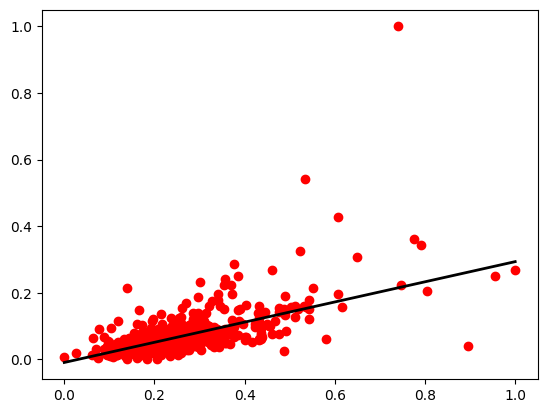

Epoch: 114 Generalization err: 0.001153104336700439


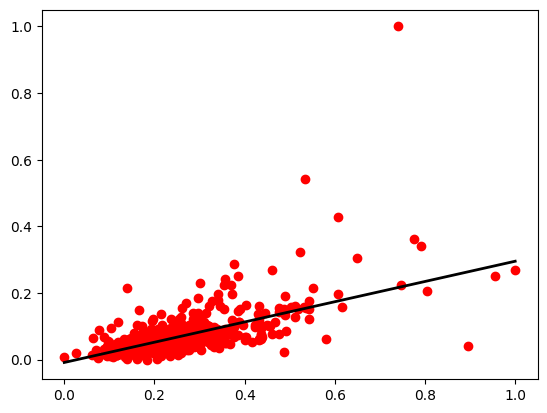

Epoch: 115 Generalization err: 0.0011534161305511675


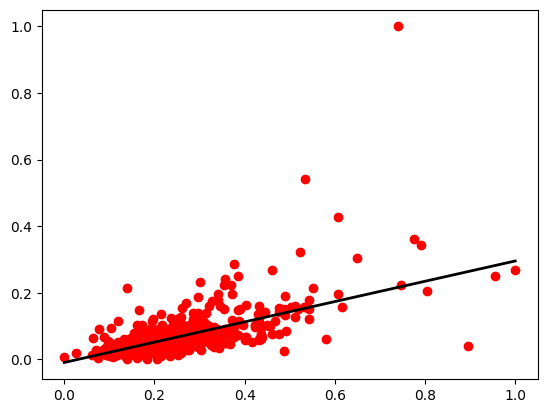

Epoch: 116 Generalization err: 0.0011526739264550935


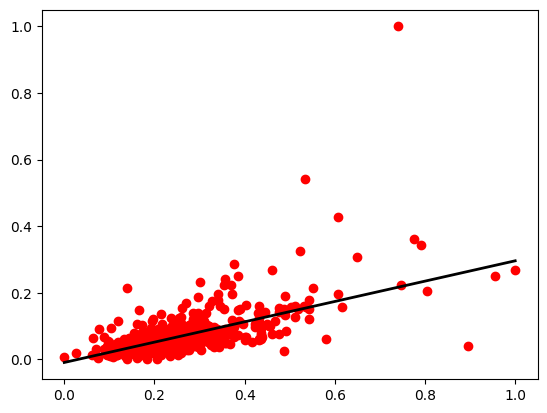

Epoch: 117 Generalization err: 0.0011523763346753578


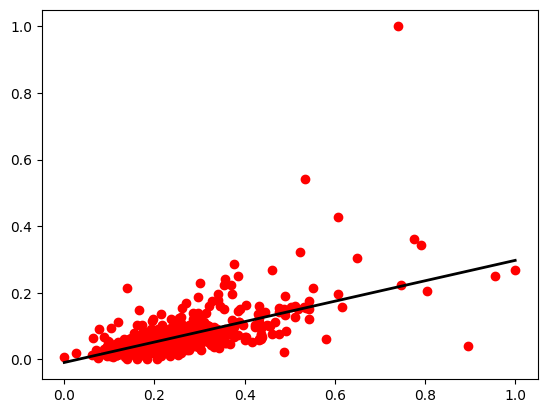

Epoch: 118 Generalization err: 0.0011536821206878571


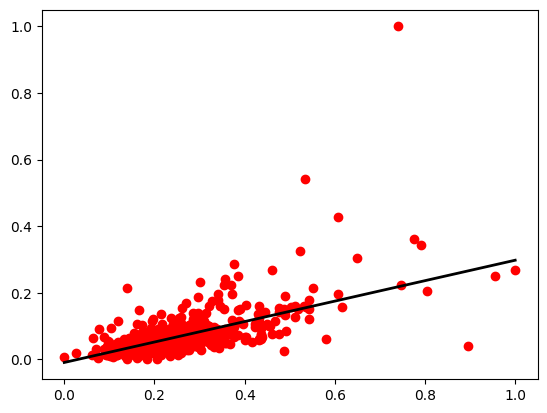

Epoch: 119 Generalization err: 0.0011526547312378805


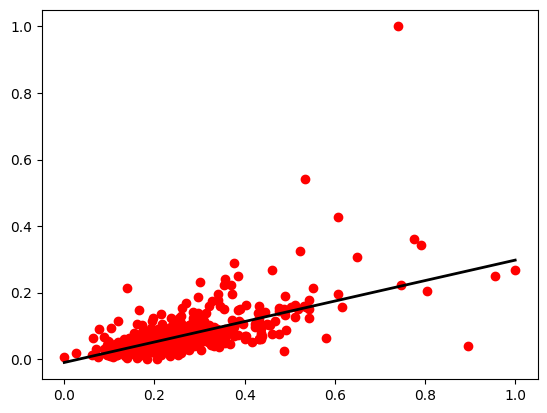

Epoch: 120 Generalization err: 0.0011518707547746242


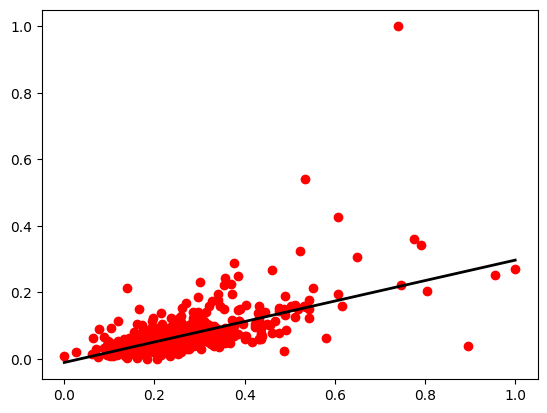

Epoch: 121 Generalization err: 0.0011519796628080092


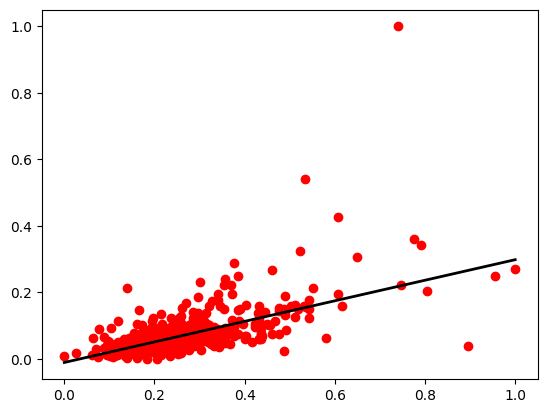

Epoch: 122 Generalization err: 0.0011516003473629605


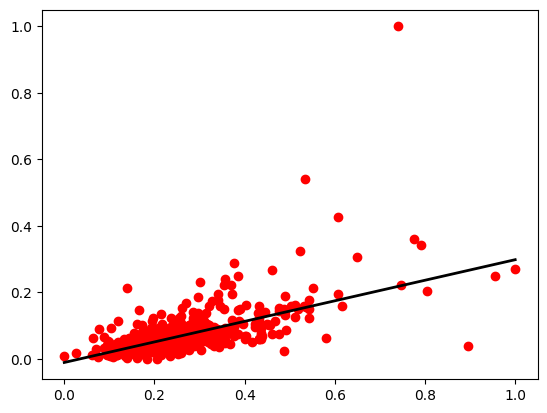

Epoch: 123 Generalization err: 0.0011516067517788843


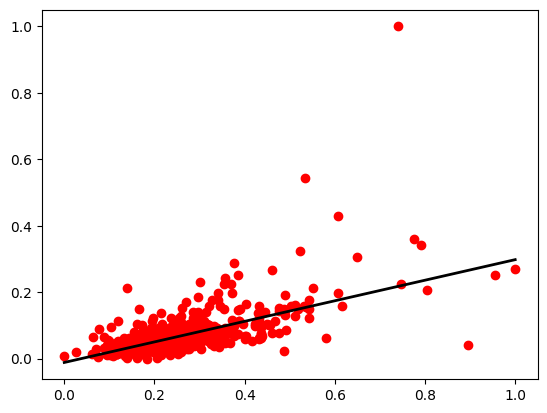

Epoch: 124 Generalization err: 0.0011523148737832567


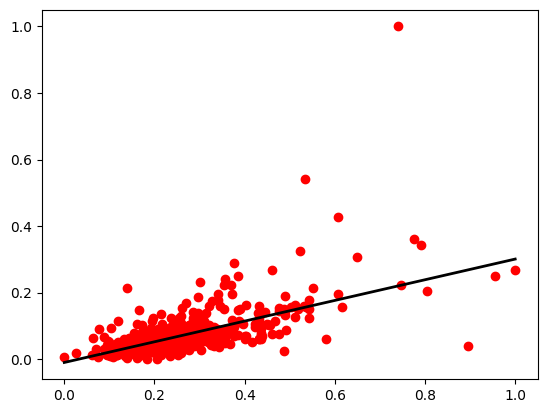

Epoch: 125 Generalization err: 0.0011524544509760799


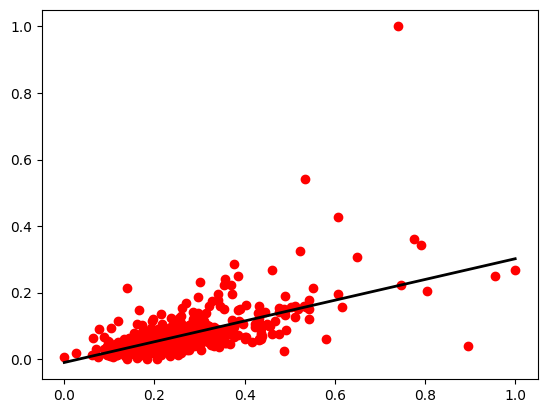

Epoch: 126 Generalization err: 0.001153587482664184


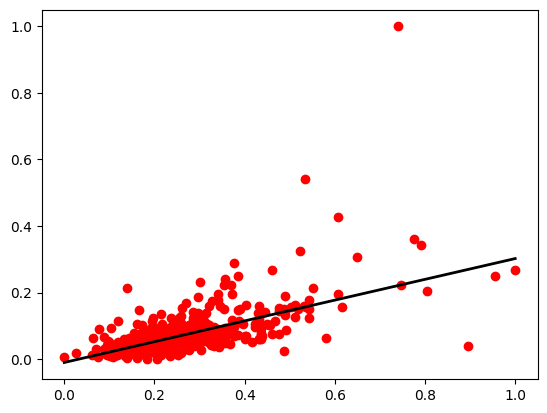

Epoch: 127 Generalization err: 0.0011527472654192835


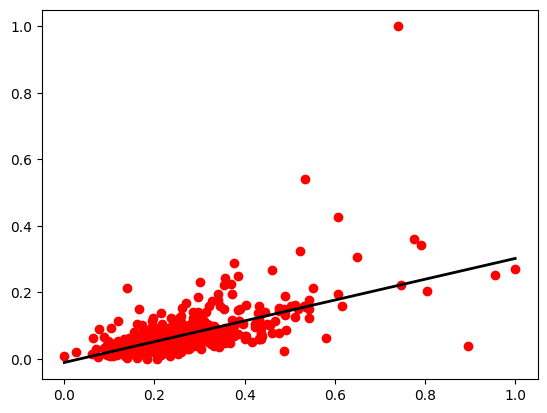

Epoch: 128 Generalization err: 0.0011515678345093586


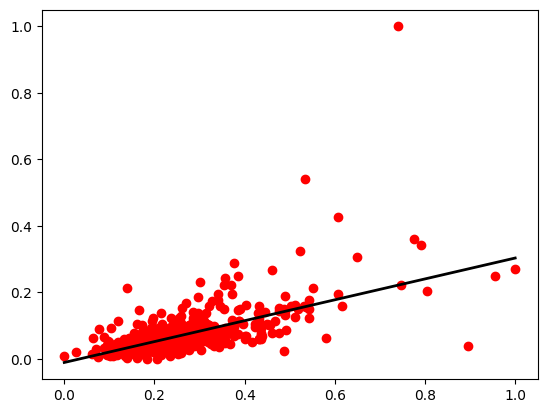

Epoch: 129 Generalization err: 0.001152617724956988


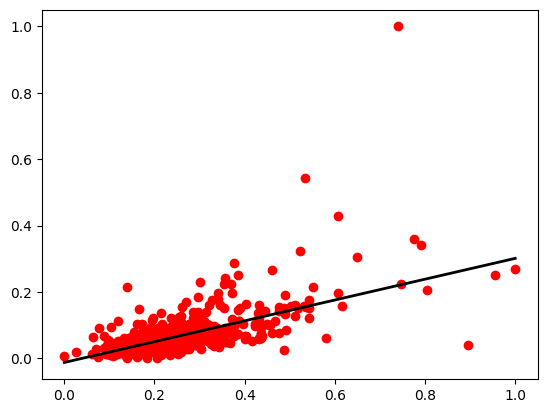

Epoch: 130 Generalization err: 0.0011514159418819746


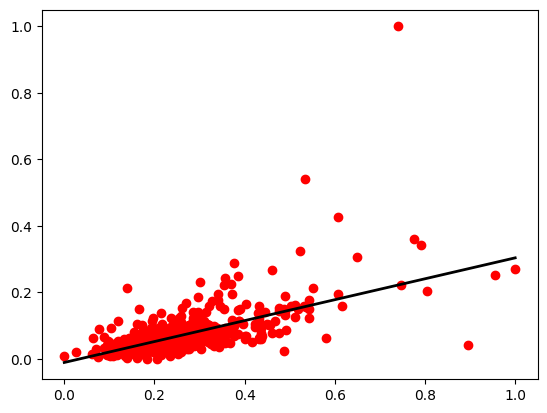

Epoch: 131 Generalization err: 0.001152135621008933


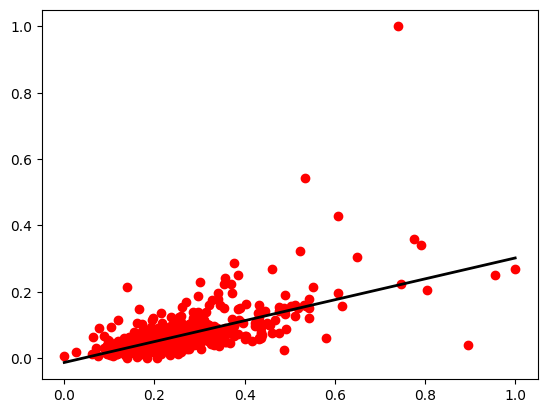

Epoch: 132 Generalization err: 0.0011518164513000845


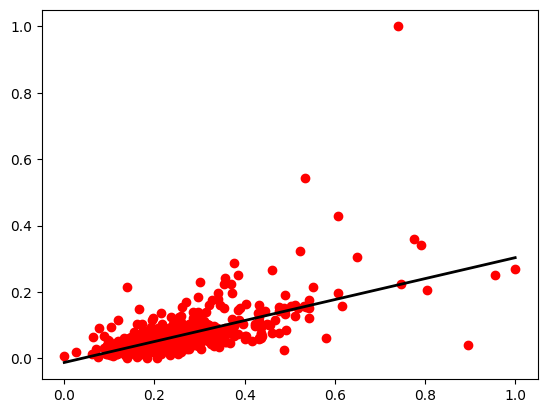

Epoch: 133 Generalization err: 0.0011511973328093574


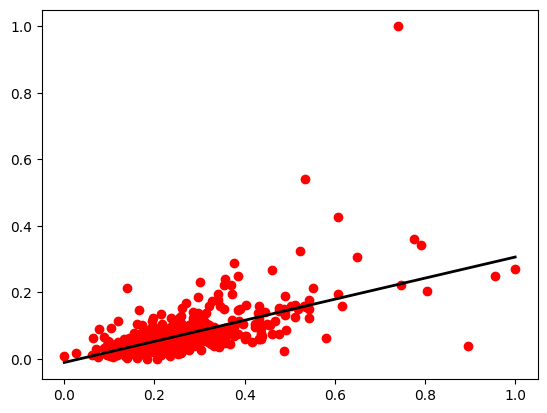

Epoch: 134 Generalization err: 0.0011556227644144035


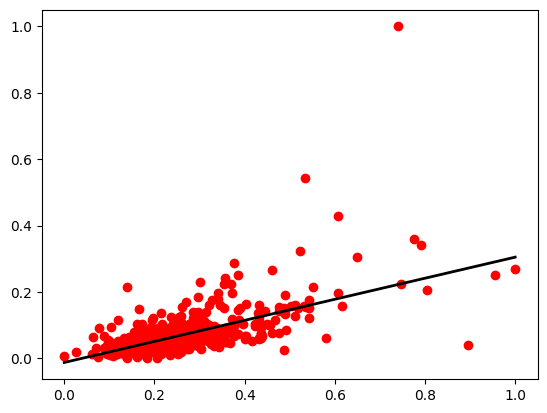

Epoch: 135 Generalization err: 0.0011512721496083846


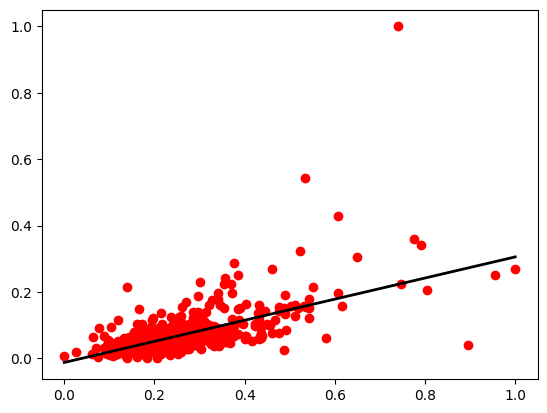

Epoch: 136 Generalization err: 0.0011513647663806857


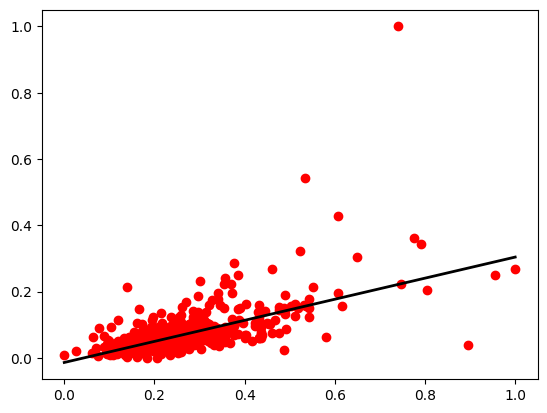

Epoch: 137 Generalization err: 0.0011521474325002746


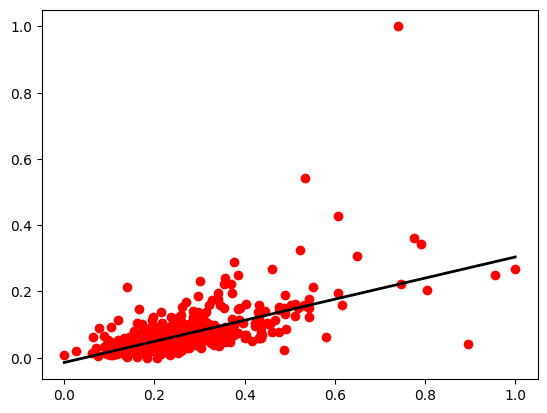

Epoch: 138 Generalization err: 0.0011533148829878772


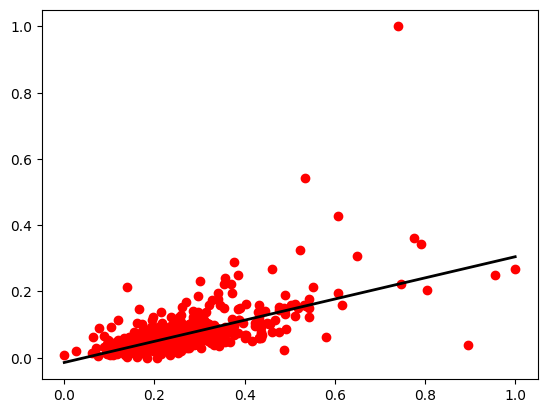

Epoch: 139 Generalization err: 0.0011525805349533657


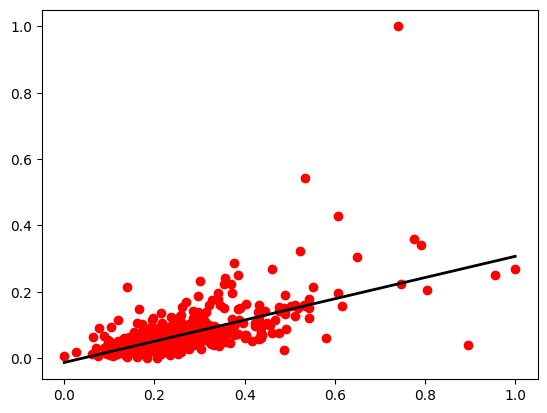

Epoch: 140 Generalization err: 0.0011516412996769342


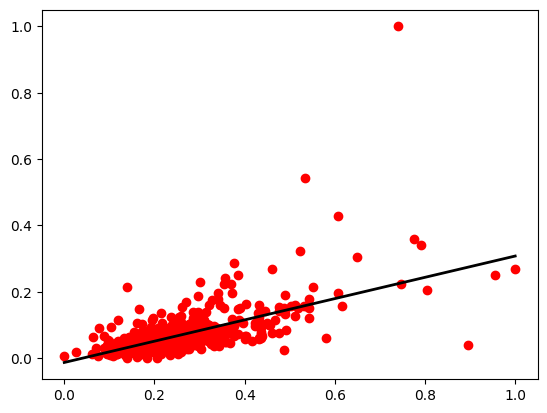

Epoch: 141 Generalization err: 0.0011521586183407078


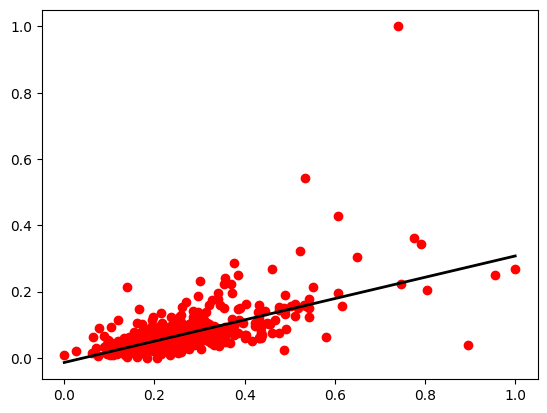

Epoch: 142 Generalization err: 0.0011518921702142445


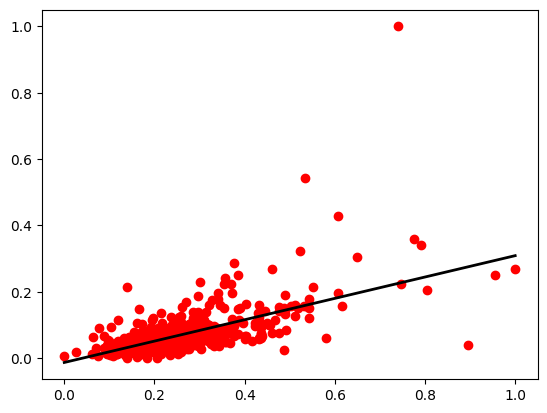

Epoch: 143 Generalization err: 0.0011528809088730647


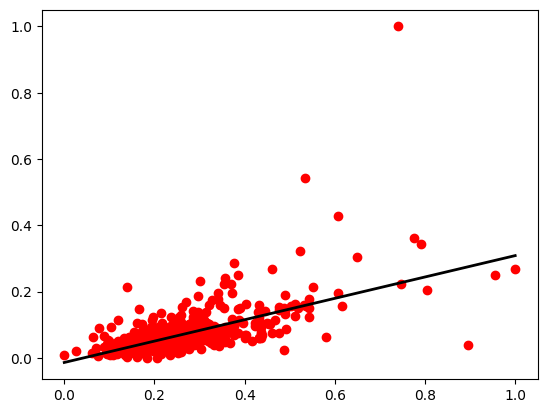

Epoch: 144 Generalization err: 0.0011521385782517143


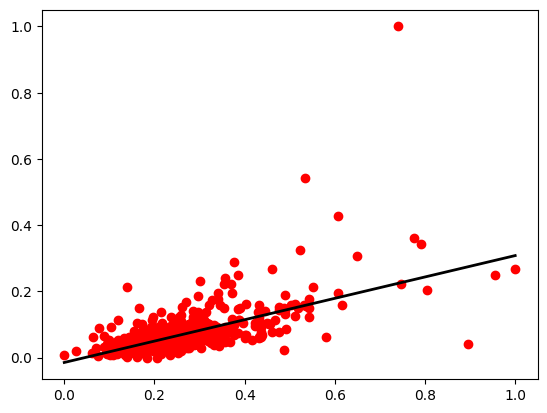

Epoch: 145 Generalization err: 0.001152440177072291


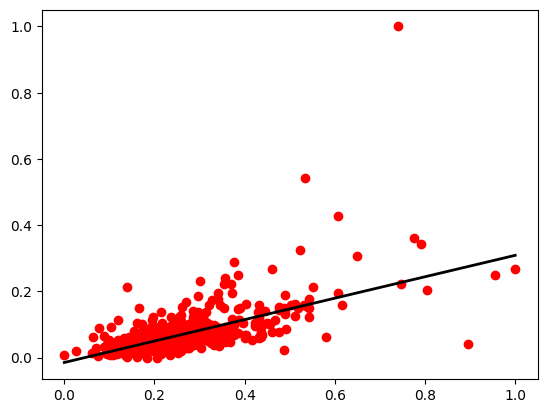

Epoch: 146 Generalization err: 0.0011524978820168068


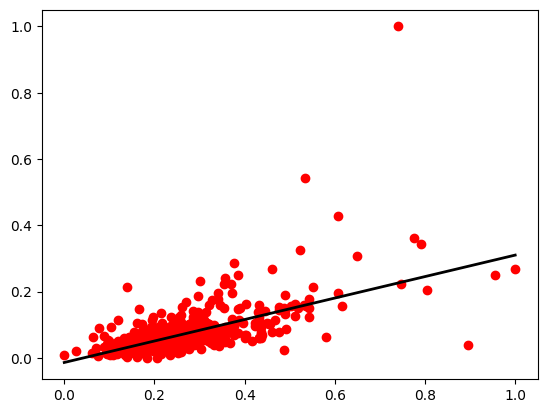

Epoch: 147 Generalization err: 0.0011526298027032303


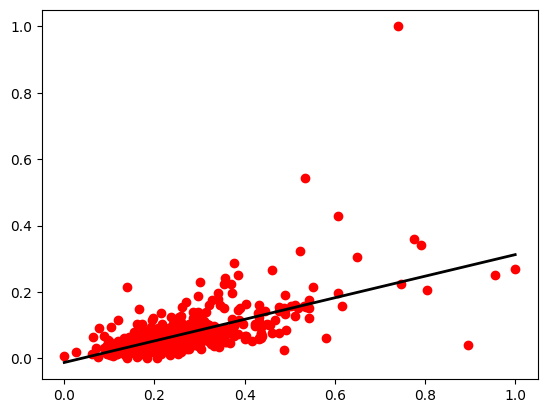

Epoch: 148 Generalization err: 0.0011563233083114746


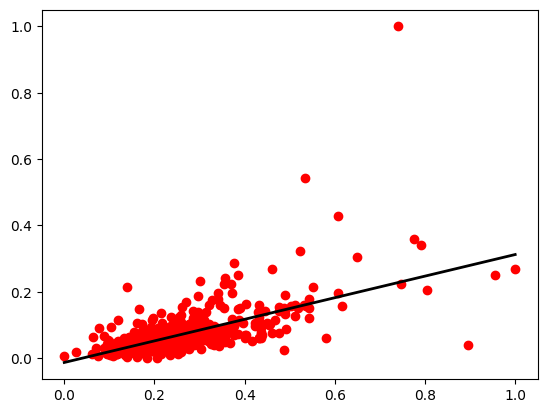

Epoch: 149 Generalization err: 0.0011547240318525351


In [34]:
#Step by step, each weight update causes a small shift in the line towards its best representation. In the end, when the error variance is small enough we can stop learning(here = 0.0011547240318525351).
for epoch in range(total_epochs):
    erros = []
    for X_batch, y_batch in next_batch(Xs_train, Ys_train, batch_size=batch_size):

        # linearly combine input and weights
        train_pred = W0 + np.dot(X_batch, W1)
    
        # calculate the SSE between predicted and true values
        train_err = mean_squared_error(y_batch, train_pred)
        erros.append(train_err)
        
        # calculate the gradients with respect to W0 and W1
        DW0 = -(2/batch_size) * sum(y_batch.squeeze() - train_pred.squeeze())
        DW1 = -(2/batch_size) * sum(X_batch.squeeze() * (y_batch.squeeze() - train_pred.squeeze()))

        # update W0 and W1 in the opposite direction to the gradient
        W0 = W0 - lr * DW0
        W1 = W1 - lr * DW1
    
    eval_and_plot(W0, W1, min_x, max_x, epoch+1)
    training_err_list.append(np.mean(erros))
    
    # test in the end of epoch
    val_pred = W0 + np.dot(np.reshape(Xs_test, (-1,1)), W1)
    val_err = mean_squared_error(Ys_test, val_pred)
    print("Epoch:", epoch, "Generalization err:", val_err)
    validation_err_list.append(val_err)
    
    #epoch += 1
    if val_err < best_hypothesis:
        best_hypothesis = val_err
        W0_hat = W0
        W1_hat = W1

Text(0, 0.5, 'Error')

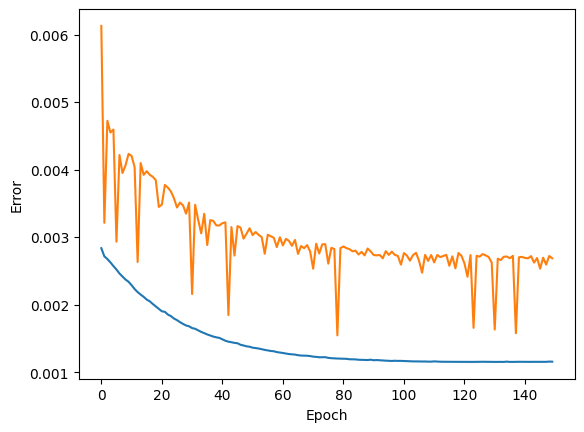

In [35]:
# plot the price and the size
plt.plot(validation_err_list, label="validation")
plt.plot(training_err_list, label="training")
plt.xlabel('Epoch')
plt.ylabel('Error')
